# Analysis of Physical Monitoring Dataset

## CONTENTS
---
### Section 1
1. Overview
2. Data Collection
3. Data Cleaning
4. Exploratory Data Analysis
 - Heartrate Analysis
 - Subject Analysis
 - Temperature Analysis
 - Sensor Analysis 
 - Data Splitting
 - Correlation
 - Preprocessing
 
### Section 2 
5. Hypothesis Testing
 - Hypothesis 1
 - Hypothesis 2
### Section 3 
6. Modelling
7. Interpretation
8. Summary
9. References

In [1]:
candidateno=####

In [2]:
# Importing all the necessary libraries which is used in this report

import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import numpy as np
from scipy import stats
from scipy import integrate
from IPython.display import HTML, display
from scipy.stats import norm
from scipy.stats import t as the
from sklearn.svm import SVC
import matplotlib.ticker as ticker
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedShuffleSplit
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix,roc_auc_score,roc_curve, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from fnmatch import fnmatch
import math
import warnings
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report

warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 70)
%matplotlib inline

Here, I set up metadata and global variables required for extracting and processing the data.

In [3]:
All_files = ["Protocol/subject101.dat",
                "Protocol/subject102.dat",
                "Protocol/subject103.dat",
                "Protocol/subject104.dat",
                "Protocol/subject105.dat",
                "Protocol/subject106.dat",
                "Protocol/subject107.dat",
                "Protocol/subject108.dat",
                "Protocol/subject109.dat"]

sub_id = [1,2,3,4,5,6,7,8,9]

actvity_id = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic walking',
              9: 'watching TV',
              10: 'computer work',
              11: 'car driving',
              12: 'ascending stairs',
              13: 'descending stairs',
              16: 'vacuum cleaning',
              17: 'ironing',
              18: 'folding laundry',
              19: 'house cleaning',
              20: 'playing soccer',
              24: 'rope jumping' }

col_names = ["timestamp", "activityID","heartrate"]

col_hand = ['handTemperature', 
           'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 
           'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 
           'handGyro1', 'handGyro2', 'handGyro3', 
           'handMagne1', 'handMagne2', 'handMagne3',
           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']

col_chest = ['chestTemperature', 
           'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 
           'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 
           'chestGyro1', 'chestGyro2', 'chestGyro3', 
           'chestMagne1', 'chestMagne2', 'chestMagne3',
           'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']

col_ankle = ['ankleTemperature', 
           'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 
           'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 
           'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 
           'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
           'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

all_columns = col_names + col_hand + col_chest + col_ankle  #all columns in one list

len(all_columns)

54

In [4]:
df = pd.DataFrame()

# Converting one dataframe for files 101 to 109
for file in All_files:
    data = pd.read_table(file, header=None, sep='\s+')
    data.columns = all_columns
    data['subjectID'] = int(file[-5])
    df = pd.concat([df, data], ignore_index=True)
    
df.reset_index(drop=True,inplace=True)
df

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subjectID
0,8.38,0,104.0,30.0000,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,-0.092217,0.056812,-0.015845,14.6806,-69.2128,-5.58905,1.000000,0.000000,0.000000,0.000000,31.8125,0.238080,9.80003,-1.688960,0.265304,9.81549,-1.413440,-0.005065,-0.006781,-0.005663,0.471960,-51.0499,43.2903,1.000000,0.000000,0.000000,0.000000,30.3125,9.65918,-1.655690,-0.099797,9.64689,-1.555760,0.310404,0.008300,0.009250,-0.017580,-61.1888,-38.95990,-58.143800,1.000000,0.000000,0.000000,0.000000,1
1,8.39,0,NaN,30.0000,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,-0.024413,0.047759,0.006474,14.8991,-69.2224,-5.82311,1.000000,0.000000,0.000000,0.000000,31.8125,0.319530,9.61282,-1.493280,0.234939,9.78539,-1.428460,0.013685,0.001486,-0.041522,1.016900,-50.3966,43.1768,1.000000,0.000000,0.000000,0.000000,30.3125,9.69370,-1.579020,-0.215687,9.61670,-1.616300,0.280488,-0.006577,-0.004638,0.000368,-59.8479,-38.89190,-58.525300,1.000000,0.000000,0.000000,0.000000,1
2,8.40,0,NaN,30.0000,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,-0.057976,0.032574,-0.006988,14.2420,-69.5197,-5.12442,1.000000,0.000000,0.000000,0.000000,31.8125,0.235593,9.72421,-1.766210,0.173850,9.72528,-1.518940,-0.039923,0.034056,-0.002113,0.383136,-51.8336,43.7782,1.000000,0.000000,0.000000,0.000000,30.3125,9.58944,-1.732760,0.092914,9.63173,-1.586050,0.280311,0.003014,0.000148,0.022495,-60.7361,-39.41380,-58.399900,1.000000,0.000000,0.000000,0.000000,1
3,8.41,0,NaN,30.0000,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,-0.002352,0.032810,-0.003747,14.8908,-69.5439,-6.17367,1.000000,0.000000,0.000000,0.000000,31.8125,0.388697,9.53572,-1.724100,0.157969,9.64994,-1.579520,0.007513,-0.010498,-0.020684,0.315400,-49.8144,43.1670,1.000000,0.000000,0.000000,0.000000,30.3125,9.58814,-1.770400,0.054545,9.63197,-1.631350,0.340997,0.003175,-0.020301,0.011275,-60.4091,-38.76350,-58.395600,1.000000,0.000000,0.000000,0.000000,1
4,8.42,0,NaN,30.0000,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,0.012269,0.018305,-0.053325,15.5612,-68.8196,-6.28927,1.000000,0.000000,0.000000,0.000000,31.8125,0.315800,9.49908,-1.609140,0.233506,9.57411,-1.444180,-0.003822,-0.011217,-0.025975,-0.297733,-51.8097,43.6453,1.000000,0.000000,0.000000,0.000000,30.3125,9.69771,-1.656250,-0.060809,9.64699,-1.646470,0.340965,0.012698,-0.014303,-0.002823,-61.5199,-39.38790,-58.269400,1.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872528,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,1.784060,0.087985,0.934673,21.1701,-35.3878,-34.04430,0.558630,-0.593878,0.292228,0.499844,32.3750,2.926640,10.21030,-0.983335,3.125630,10.62120,0.642058,-0.034671,-0.222172,-0.191336,15.599100,-40.9116,14.9966,0.625172,-0.760781,-0.039443,-0.169753,31.5000,9.38737,-0.565040,-3.273700,9.09401,-0.228554,-2.687700,-0.037788,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,0.598531,0.033615,0.799791,-0.031075,9
2872529,100.20,0,NaN,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,4.43102,1.475210,-0.028917,0.806540,20.7931,-34.9954,-34.17720,0.555545,-0.596490,0.299264,0.495995,32.3750,2.722810,9.37125,-2.

In [5]:
# Quick glance at the dataset

df.tail(5)

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subjectID
2872528,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,1.78406,0.087985,0.934673,21.1701,-35.3878,-34.0443,0.558630,-0.593878,0.292228,0.499844,32.375,2.92664,10.21030,-0.983335,3.12563,10.62120,0.642058,-0.034671,-0.222172,-0.191336,15.5991,-40.9116,14.9966,0.625172,-0.760781,-0.039443,-0.169753,31.5,9.38737,-0.565040,-3.27370,9.09401,-0.228554,-2.68770,-0.037788,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,0.598531,0.033615,0.799791,-0.031075,9
2872529,100.20,0,NaN,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,4.43102,1.47521,-0.028917,0.806540,20.7931,-34.9954,-34.1772,0.555545,-0.596490,0.299264,0.495995,32.375,2.72281,9.37125,-2.649300,2.83965,9.86963,-1.111460,-0.068016,-0.217669,-0.211320,15.3637,-41.2887,14.0101,0.625592,-0.760751,-0.039538,-0.168312,31.5,9.45875,-1.020820,-3.30873,9.27291,-0.607010,-2.99014,-0.068904,-0.027006,-0.089808,-45.7474,3.54453,0.108583,0.598428,0.033012,0.799933,-0.030018,9
2872530,100.21,0,NaN,25.1875,-4.93997,9.83615,3.70468,-5.04613,10.35690,4.14405,1.29099,-0.155493,0.762446,20.6763,-36.6013,-32.4612,0.553254,-0.598417,0.305463,0.492442,32.375,2.65722,9.07285,-2.262310,2.64813,9.29824,-2.351200,-0.077873,-0.152311,-0.237024,15.8809,-41.4368,14.0146,0.625921,-0.760792,-0.039435,-0.166927,31.5,9.57580,-0.528578,-3.23340,9.43813,-0.697724,-2.99072,-0.070888,-0.038024,-0.064709,-46.3997,4.22078,0.105504,0.598233,0.033172,0.800095,-0.029416,9
2872531,100.22,0,NaN,25.1875,-4.64941,9.11129,3.51904,-5.06854,9.75268,3.87359,1.20794,-0.311214,0.748814,20.5408,-35.8494,-32.3342,0.551068,-0.599876,0.311399,0.489390,32.375,2.61289,8.88341,-2.456100,2.55741,9.02648,-2.139860,0.138759,0.027529,-0.333854,15.6351,-42.2015,14.0172,0.625555,-0.761266,-0.040453,-0.165888,31.5,9.49894,-0.489493,-3.31161,9.49875,-0.576563,-2.87035,0.018961,-0.025796,-0.064357,-46.5282,4.48593,0.530240,0.598116,0.033427,0.800180,-0.029208,9
2872532,100.23,0,161.0,25.1875,-4.09726,8.15642,3.29961,-4.73244,8.82870,3.54305,1.40417,-0.396125,0.728581,20.3057,-37.3255,-31.5374,0.548065,-0.601715,0.317869,0.486336,32.375,2.77196,9.22311,-2.260720,2.52647,8.90583,-2.155140,0.250226,0.035799,-0.396232,16.0015,-41.0545,14.1542,0.624731,-0.762119,-0.041858,-0.164721,31.5,9.42169,-0.526345,-3.38935,9.51292,-0.470945,-3.08266,-0.027472,0.011866,-0.042858,-46.2704,4.21475,0.247798,0.598119,0.033685,0.800188,-0.028602,9


In [6]:
# Get number of features and column names un the data

print(df.columns)
print(len(df.columns))

Index(['timestamp', 'activityID', 'heartrate', 'handTemperature',
       'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3', 'handOrientation1', 'handOrientation2',
       'handOrientation3', 'handOrientation4', 'chestTemperature',
       'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1',
       'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3', 'chestOrientation1',
       'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
       'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
       'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2',
       'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
       'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3',
       'ankleOrientation4', 'subjectID'],
      dtype='

After being loaded, there are around 55 features in the dataset.
The sample of the dataframe that was built above shows that some data cleaning is required. For example, **activityID == 0** has to be completely removed from our dataset since, as the readme file explains, this is a brief period of time when the subject was not involved in any particular activity. The part that follows will go into considerable length on data cleaning.

# DATA CLEANING
---
The PerformedActivitiesSummary file in the collection of files makes it clear that specific data is missing. Furthermore, as mentioned in the readme file notes, there were also some wireless disconnections that happened throughout the data collection process; therefore, in order to prevent disruptions to our data analysis, the missing data must be balanced and explained. More specifically, each activity included eight or fewer subjects, and each activity included NaN values for a range of subjects.

Therefore, there has been some data filling done. For the NaN values in our data, I must use interpolate, which creates a new data point from a set of known data points.

As a suggestion, the code below should first eliminate "activity 0" to enable for interpolation because the data it contains is extremely distracting. This would have a significant impact on the result because the heart rate values are not derived from the set of data points that represent activities that are actually important.

After removing the orientation data, which had been identified as "invalid in this data collection," I followed the advice of the data sources and eliminated a few other attributes, including:
* The gap time between the 24 numbered activities in the raw data collection are set to zero. These periods of transition are no longer in effect. Two distinct body sections were equipped with accelerometers on the subjects: one type had a resolution of 16 grammes, while the other had a resolution of 6 grammes. The data collected by the later group has been removed due to its low precision.

The data providers also point out that the heart rate monitor's precision is restricted because the rate at which the IMUs and the heart monitor collected information varied. Since the cardiac sensors only gathered data nine times per second as opposed to the IMU sensors' 100 times per second, there was a 90.87% loss of data.

On first examining the data set, I found that the IMUs for the hand, chest, and ankle each had 0.57%, 0.12%, and 0.44% of missing data, respectively.


In [7]:
# Check shape of data before commencing cleaning

df.shape

(2872533, 55)

In [8]:
# comparing values for duplication
df[df.duplicated()]

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subjectID


There are no duplicate cells, as we can observe.

Making sure all the columns are listed and that none are missing.

In [9]:
df.columns

Index(['timestamp', 'activityID', 'heartrate', 'handTemperature',
       'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3', 'handOrientation1', 'handOrientation2',
       'handOrientation3', 'handOrientation4', 'chestTemperature',
       'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1',
       'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3', 'chestOrientation1',
       'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
       'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
       'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2',
       'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
       'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3',
       'ankleOrientation4', 'subjectID'],
      dtype='

#### Data Type
Here, I am looking for any non-numerical data that might present in features that are in the numeric type.

In [10]:
# Check for non numeric data type

for col in df:
    print(col.isalpha())

True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True


#### Handle Missing Values

Blanks, dashes, or NaN represent missing values. Values that are missing can either be entirely random or they may be removed consistently for some reason. Most of the missing values in this report come from wireless disconnections that happened while collecting the data.

In [11]:
# Check for missing values

df.isnull().sum()

timestamp                  0
activityID                 0
heartrate            2610265
handTemperature        13141
handAcc16_1            13141
                      ...   
ankleOrientation1      11749
ankleOrientation2      11749
ankleOrientation3      11749
ankleOrientation4      11749
subjectID                  0
Length: 55, dtype: int64

#### Drop Unnecessary Features and Clean Data

Here, I drop some features that are not important to the analysis of this data

In [12]:
# removing the position of columns since they are unnecessary
df.drop(['handOrientation1', 
         'handOrientation2', 
         'handOrientation3', 
         'handOrientation4',
         'chestOrientation1', 
         'chestOrientation2', 
         'chestOrientation3', 
         'chestOrientation4',
         'ankleOrientation1', 
         'ankleOrientation2', 
         'ankleOrientation3', 
         'ankleOrientation4'], axis = 1, inplace=True)

In [13]:
df.shape

(2872533, 43)

In [14]:
# removing any rows with the activity 0 because it is temporary activity that is not required
df = df.drop(df[df.activityID == 0].index)
df.head(10)

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subjectID
2928,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,0.037579,-0.011145,8.93200,-67.9326,-19.9755,32.1875,0.124482,9.65003,-1.65181,0.143941,9.71019,-1.47347,0.036668,0.016559,-0.052791,0.567566,-50.7269,44.2728,30.75,9.73855,-1.84761,0.095156,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
2929,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,0.025479,-0.009538,9.58300,-67.9584,-20.9091,32.1875,0.200711,9.64980,-1.65043,0.129092,9.74041,-1.47329,0.019343,-0.024304,-0.059843,0.904990,-50.5080,43.5427,30.75,9.69762,-1.88438,-0.020804,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2930,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,0.011214,0.000831,9.05516,-67.4017,-19.5083,32.1875,0.270277,9.72331,-1.88174,0.144685,9.77048,-1.41285,-0.001428,0.038466,-0.046464,0.455480,-50.7209,44.0259,30.75,9.69633,-1.92203,-0.059173,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
2931,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,0.019053,0.013374,9.92698,-67.4387,-20.5602,32.1875,0.236737,9.72447,-1.72746,0.174402,9.75538,-1.45841,0.017277,-0.048547,-0.074946,0.324284,-50.1544,43.6570,30.75,9.66370,-1.84714,0.094385,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
2932,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,32.1875,0.352225,9.72437,-1.68665,0.173568,9.69512,-1.53414,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.9228,30.75,9.77578,-1.88582,0.095775,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1
2933,37.71,1,NaN,30.375,2.07165,7.25965,6.01218,2.19238,7.21038,6.01604,0.063895,0.007175,0.024701,8.60505,-66.7184,-19.8429,32.1875,0.271221,9.64826,-1.84275,0.188981,9.72523,-1.50392,-0.002481,-0.018131,-0.045486,1.010820,-50.4054,44.1573,30.75,9.65780,-1.92147,-0.098161,9.60177,-1.75239,0.311276,0.003793,-0.026906,0.004125,-61.3257,-36.9744,-57.7501,1
2934,37.72,1,NaN,30.375,2.41148,7.59780,5.93915,2.23988,7.46679,6.03053,0.190837,0.003116,0.038762,9.16003,-66.8578,-19.9665,32.1875,0.274553,9.61139,-1.72641,0.158971,9.67993,-1.44342,0.024609,-0.022451,-0.033739,1.261700,-50.9669,43.5475,30.75,9.65839,-1.80756,-0.098862,9.67694,-1.76748,0.326060,0.036814,-0.032277,-0.006866,-61.5520,-36.9632,-57.9957,1
2935,37.73,1,NaN,30.375,2.32815,7.63431,5.70686,2.31663,7.64745,6.01495,0.200328,-0.009266,0.068567,9.47898,-67.3025,-20.6693,32.1875,0.238925,9.68733,-1.64986,0.173916,9.66480,-1.44355,0.012477,-0.000388,-0.031705,0.355493,-51.1679,44.3915,30.75,9.65690,-1.88318,-0.136998,9.61685,-1.76749,0.326380,-0.010352,-0.016621,0.006548,-61.5738,-36.1724,-59.3487,1
2936,37.74,1,NaN,30.375,2.25096,7.78598,5.62821,2.28637,7.70801,5.93935,0.204098,-0.068256,0.050000,9.15218,-67.0705,-20.3159,32.1875,0.349738,9.64854,-1.76389,0.188777,9.66481,-1.47387,0.017892,-0.018287,-0.037089,0.125653,-50.9288,43.5303,30.75,9.77727,-1.81020,0.133911,9.61686,-1.72212,0.326234,0.039346,0.020393,-0.011880,-61.7741,-37.1744,-58.1199,1
2937,37.75,1,NaN,30.375,2.14107,7.52262,5.78141,2.31538,7.72276,5.78828,0.171291,-0.055411,0.021576,9.49746,-66.7700,-19.8537,32.1875,0.120851,9.57395,-1.76780,0.173370,9.64982,-1.51916,0.003232,-0.027850,-0.015378,0.920127,-50.9566,43.6649,30.75,9.69492,-1.76951,-0.1373

Since the numbers around the NaN cell are determined via interpolation, heartrate still contains NaN values. After interpolation, it is common for further NaN values to be generated because the original cells are NaN. The next step that we will take to solve this issue is as follows.

In [15]:
round(100*(df.isnull().sum()/len(df.index)), 2)

timestamp           0.00
activityID          0.00
heartrate          90.87
handTemperature     0.57
handAcc16_1         0.57
                   ...  
ankleGyro3          0.44
ankleMagne1         0.44
ankleMagne2         0.44
ankleMagne3         0.44
subjectID           0.00
Length: 43, dtype: float64

In [16]:
df = df.apply(pd.to_numeric, errors = 'coerce')

Adding additional data points to the current collection of data points will eliminate any remaining cells with NaN values.

In [17]:
df = df.interpolate()

In [18]:
df.reset_index(drop = True, inplace = True)
df.head(10)

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subjectID
0,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,0.037579,-0.011145,8.93200,-67.9326,-19.9755,32.1875,0.124482,9.65003,-1.65181,0.143941,9.71019,-1.47347,0.036668,0.016559,-0.052791,0.567566,-50.7269,44.2728,30.75,9.73855,-1.84761,0.095156,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
1,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,0.025479,-0.009538,9.58300,-67.9584,-20.9091,32.1875,0.200711,9.64980,-1.65043,0.129092,9.74041,-1.47329,0.019343,-0.024304,-0.059843,0.904990,-50.5080,43.5427,30.75,9.69762,-1.88438,-0.020804,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,0.011214,0.000831,9.05516,-67.4017,-19.5083,32.1875,0.270277,9.72331,-1.88174,0.144685,9.77048,-1.41285,-0.001428,0.038466,-0.046464,0.455480,-50.7209,44.0259,30.75,9.69633,-1.92203,-0.059173,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
3,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,0.019053,0.013374,9.92698,-67.4387,-20.5602,32.1875,0.236737,9.72447,-1.72746,0.174402,9.75538,-1.45841,0.017277,-0.048547,-0.074946,0.324284,-50.1544,43.6570,30.75,9.66370,-1.84714,0.094385,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,32.1875,0.352225,9.72437,-1.68665,0.173568,9.69512,-1.53414,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.9228,30.75,9.77578,-1.88582,0.095775,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1
5,37.71,1,100.0,30.375,2.07165,7.25965,6.01218,2.19238,7.21038,6.01604,0.063895,0.007175,0.024701,8.60505,-66.7184,-19.8429,32.1875,0.271221,9.64826,-1.84275,0.188981,9.72523,-1.50392,-0.002481,-0.018131,-0.045486,1.010820,-50.4054,44.1573,30.75,9.65780,-1.92147,-0.098161,9.60177,-1.75239,0.311276,0.003793,-0.026906,0.004125,-61.3257,-36.9744,-57.7501,1
6,37.72,1,100.0,30.375,2.41148,7.59780,5.93915,2.23988,7.46679,6.03053,0.190837,0.003116,0.038762,9.16003,-66.8578,-19.9665,32.1875,0.274553,9.61139,-1.72641,0.158971,9.67993,-1.44342,0.024609,-0.022451,-0.033739,1.261700,-50.9669,43.5475,30.75,9.65839,-1.80756,-0.098862,9.67694,-1.76748,0.326060,0.036814,-0.032277,-0.006866,-61.5520,-36.9632,-57.9957,1
7,37.73,1,100.0,30.375,2.32815,7.63431,5.70686,2.31663,7.64745,6.01495,0.200328,-0.009266,0.068567,9.47898,-67.3025,-20.6693,32.1875,0.238925,9.68733,-1.64986,0.173916,9.66480,-1.44355,0.012477,-0.000388,-0.031705,0.355493,-51.1679,44.3915,30.75,9.65690,-1.88318,-0.136998,9.61685,-1.76749,0.326380,-0.010352,-0.016621,0.006548,-61.5738,-36.1724,-59.3487,1
8,37.74,1,100.0,30.375,2.25096,7.78598,5.62821,2.28637,7.70801,5.93935,0.204098,-0.068256,0.050000,9.15218,-67.0705,-20.3159,32.1875,0.349738,9.64854,-1.76389,0.188777,9.66481,-1.47387,0.017892,-0.018287,-0.037089,0.125653,-50.9288,43.5303,30.75,9.77727,-1.81020,0.133911,9.61686,-1.72212,0.326234,0.039346,0.020393,-0.011880,-61.7741,-37.1744,-58.1199,1
9,37.75,1,100.0,30.375,2.14107,7.52262,5.78141,2.31538,7.72276,5.78828,0.171291,-0.055411,0.021576,9.49746,-66.7700,-19.8537,32.1875,0.120851,9.57395,-1.76780,0.173370,9.64982,-1.51916,0.003232,-0.027850,-0.015378,0.920127,-50.9566,43.6649,30.75,9.69492,-1.76951,-0.137313,9.63189,-1.70699,

The period when the NaN values for heart rate occured indicates that there might be missing values during the start of the measurements. These missing values could not be interpolated using pandas interpolation function. A heartrate of 100 is filled in place because the activity id and subject id are the same as the missing values.

In [19]:
df.loc[:4, 'heartrate'] = 100
df['heartrate'].isna().sum()

0

#### Handle Duplicate Values

In [20]:
df.duplicated().sum()

0

In [21]:
#Get data information after cleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1942872 entries, 0 to 1942871
Data columns (total 43 columns):
 #   Column            Dtype  
---  ------            -----  
 0   timestamp         float64
 1   activityID        int64  
 2   heartrate         float64
 3   handTemperature   float64
 4   handAcc16_1       float64
 5   handAcc16_2       float64
 6   handAcc16_3       float64
 7   handAcc6_1        float64
 8   handAcc6_2        float64
 9   handAcc6_3        float64
 10  handGyro1         float64
 11  handGyro2         float64
 12  handGyro3         float64
 13  handMagne1        float64
 14  handMagne2        float64
 15  handMagne3        float64
 16  chestTemperature  float64
 17  chestAcc16_1      float64
 18  chestAcc16_2      float64
 19  chestAcc16_3      float64
 20  chestAcc6_1       float64
 21  chestAcc6_2       float64
 22  chestAcc6_3       float64
 23  chestGyro1        float64
 24  chestGyro2        float64
 25  chestGyro3        float64
 26  chestMagne1   

In [22]:
df.head()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subjectID
0,37.66,1,100.0,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,0.037579,-0.011145,8.93200,-67.9326,-19.9755,32.1875,0.124482,9.65003,-1.65181,0.143941,9.71019,-1.47347,0.036668,0.016559,-0.052791,0.567566,-50.7269,44.2728,30.75,9.73855,-1.84761,0.095156,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
1,37.67,1,100.0,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,0.025479,-0.009538,9.58300,-67.9584,-20.9091,32.1875,0.200711,9.64980,-1.65043,0.129092,9.74041,-1.47329,0.019343,-0.024304,-0.059843,0.904990,-50.5080,43.5427,30.75,9.69762,-1.88438,-0.020804,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2,37.68,1,100.0,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,0.011214,0.000831,9.05516,-67.4017,-19.5083,32.1875,0.270277,9.72331,-1.88174,0.144685,9.77048,-1.41285,-0.001428,0.038466,-0.046464,0.455480,-50.7209,44.0259,30.75,9.69633,-1.92203,-0.059173,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
3,37.69,1,100.0,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,0.019053,0.013374,9.92698,-67.4387,-20.5602,32.1875,0.236737,9.72447,-1.72746,0.174402,9.75538,-1.45841,0.017277,-0.048547,-0.074946,0.324284,-50.1544,43.6570,30.75,9.66370,-1.84714,0.094385,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,32.1875,0.352225,9.72437,-1.68665,0.173568,9.69512,-1.53414,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.9228,30.75,9.77578,-1.88582,0.095775,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1


## 4. EXPLORATORY DATA ANALYSIS

We should proceed with stratification before splitting our data if the classes are balanced, as this will remove reasons for it. If there is an imbalance in the class weights, we should stratify the data before splitting it. Stratified sampling is a process that involves choosing samples from each class and dividing them into subsets for the train and test sets. It helps to get better outcomes when the weight distribution of the classes is unusual. A normal distribution should result in weights for each class that are similar to those of the other classes.

In [23]:
df.describe()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subjectID
count,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06
mean,1.705202e+03,8.081830e+00,1.074879e+02,3.275126e+01,-4.952973e+00,3.585079e+00,3.602232e+00,-4.886286e+00,3.573597e+00,3.786931e+00,1.480977e-03,3.974584e-02,-3.182852e-03,2.114699e+01,-1.396831e+01,-2.437034e+01,3.617908e+01,3.333707e-01,8.152683e+00,-1.450553e+00,1.993197e-01,8.148290e+00,-1.121257e+00,5.575033e-03,1.174622e-02,-2.290167e-02,4.470582e+00,-3.065308e+01,4.585338e+00,3.371194e+01,9.408387e+00,-1.531939e-01,-2.592432e+00,9.378478e+00,-4.550154e-02,-2.174212e+00,9.960309e-03,-3.652767e-02,6.658552e-03,-3.158971e+01,1.396960e+00,1.725039e+01,4.566387e+00
std,1.093463e+03,6.174789e+00,2.699215e+01,1.794162e+00,6.239663e+00,6.893705e+00,3.956957e+00,6.245972e+00,6.589666e+00,3.942860e+00,1.332331e+00,9.562312e-01,1.598818e+00,2.380841e+01,2.423180e+01,2.007772e+01,1.495082e+00,1.742569e+00,4.889461e+00,4.762784e+00,1.738353e+00,4.849979e+00,4.770992e+00,4.498953e-01,5.644552e-01,3.173265e-01,1.704069e+01,1.753230e+01,2.159140e+01,1.092343e+00,6.528143e+00,7.739433e+00,3.936154e+00,6.067634e+00,7.190996e+00,3.475429e+00,1.126903e+00,6.383285e-01,2.012898e+00,1.834639e+01,2.168678e+01,1.970652e+01,2.333052e+00
min,3.120000e+01,1.000000e+00,5.700000e+01,2.487500e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.121470e+01,-6.184170e+01,-6.193470e+01,-2.813540e+01,-1.784950e+01,-1.426470e+01,-1.039410e+02,-2.000430e+02,-1.649370e+02,3.193750e+01,-3.920340e+01,-4.692460e+01,-8.016680e+01,-3.420400e+01,-4.825720e+01,-6.180410e+01,-1.252510e+01,-5.068580e+00,-4.404200e+00,-7.006270e+01,-1.224800e+02,-6.668470e+01,3.000000e+01,-1.550680e+02,-1.574430e+02,-1.589260e+02,-6.114200e+01,-6.190640e+01,-6.231480e+01,-2.399500e+01,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.027160e+02,1.000000e+00
25%,7.445400e+02,3.000000e+00,8.600000e+01,3.168750e+01,-8.969760e+00,1.058210e+00,1.161470e+00,-8.866490e+00,1.057690e+00,1.363370e+00,-3.784182e-01,-2.240660e-01,-3.857312e-01,4.853775e+00,-2.907890e+01,-3.870343e+01,3.518750e+01,-5.129543e-01,5.947307e+00,-4.206803e+00,-6.317245e-01,5.903118e+00,-3.878582e+00,-1.096140e-01,-1.363850e-01,-1.312003e-01,-6.094660e+00,-3.991250e+01,-9.829978e+00,3.300000e+01,8.426530e+00,-2.173030e+00,-3.811010e+00,8.398307e+00,-2.073670e+00,-3.398540e+00,-2.086955e-01,-1.066082e-01,-4.416998e-01,-4.171632e+01,-1.248465e+01,3.794668e+00,2.000000e+00
50%,1.480330e+03,6.000000e+00,1.040000e+02,3.312500e+01,-5.450280e+00,3.526550e+00,3.431410e+00,-5.378515e+00,3.567850e+00,3.662640e+00,-5.993640e-03,5.932665e-03,-5.635270e-03,2.295240e+01,-1.612830e+01,-2.387340e+01,3.643750e+01,4.398730e-01,9.197460e+00,-1.462170e+00,3.089465e-01,9.137370e+00,-1.105510e+00,2.695790e-03,6.823410e-04,-1.689240e-02,2.710045e+00,-3.344450e+01,2.966885e+00,3.406250e+01,9.538370e+00,-2.906860e-01,-2.419090e+00,9.551120e+00,-2.252230e-01,-1.991685e+00,4.606210e-03,-3.950165e-03,-2.327570e-03,-3.400820e+01,7.769370e-01,1.876755e+01,5.000000e+00
75%,2.663610e

The output above show that the mean heartrate is about $107$. The maximum is $202$ which might be indicative of an outlier probably as a result of a malfunction from the heartrate monitor or vigorous activities performed at that time. 

### HEARTRATE ANALYSIS

The focus of the analysis in this subsection is the heartrate, which by implication from the readme file provided is the most precise meter for tracking subjects while they perform the various activities.
Below, I look at the distribution of the heartrate recorded by the heartrate monitor for different subjects.

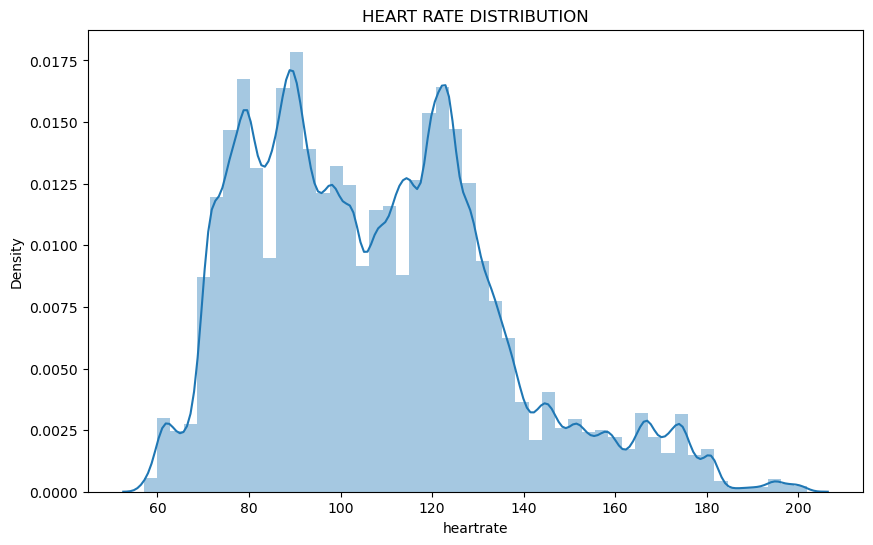

In [24]:
# Visualize the distribution of heartrate

fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(df['heartrate'])
plt.title("HEART RATE DISTRIBUTION")
plt.show()

There is a positive skew in the distribution plot. A distribution has been determined to be positively skew if its right tail is longer and its mass is concentrated on the left side of the graph. Even though the curve itself seems to be skewed or leaning to the left, the distribution is said to be right-skewed, right-tailed, or skewed to the right; right instead refers to the right tail being drawn out and, frequently, this mean being skewed to the right of a typical centre of the data. A curve that bends left is typically indicative of a right-skewed distribution. This distribution's mean, which is larger than the median or mode, should be shown on the right side of the graph. This shape indicates there are a few data points that are larger than the mode, possibly outliers. Meaning: Mode > Median > Mean. A higher proportion of the heart rate appears to be concentrated between 70 and 140. I created a boxplot to help visualise how skewed the heartrate distribution is.

The boxplot shows how most of the heartrate data, which ranges from 86 to 124, is grouped around the mean. Also, this makes clear what would be seen as an a pattern start at 180–202. Observations that are extremely different from other values in a sample are called outliers. This could have an impact on a sample's mean and, consequently, on analyses or tests that depend on a normal distribution. No outliers would be removed for the purposes of this analysis.

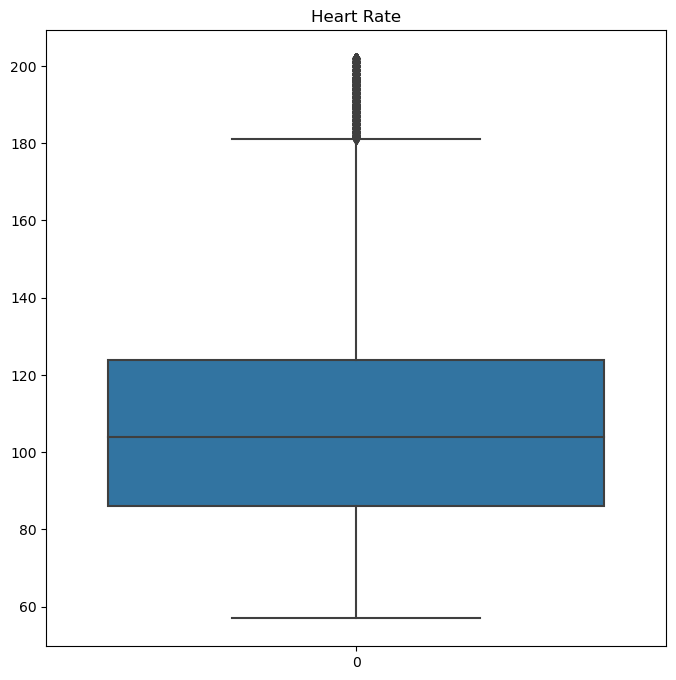

In [25]:
# Boxplot of Heartrate

fig, ax = plt.subplots(figsize=(8,8))
plt.title("Heart Rate")
sns.boxplot(df['heartrate'])
plt.show()

Heart rate is expected to increase during demanding or tasking activities. In order to plot the heart rate for each activity completed, I plot a bar chart here.

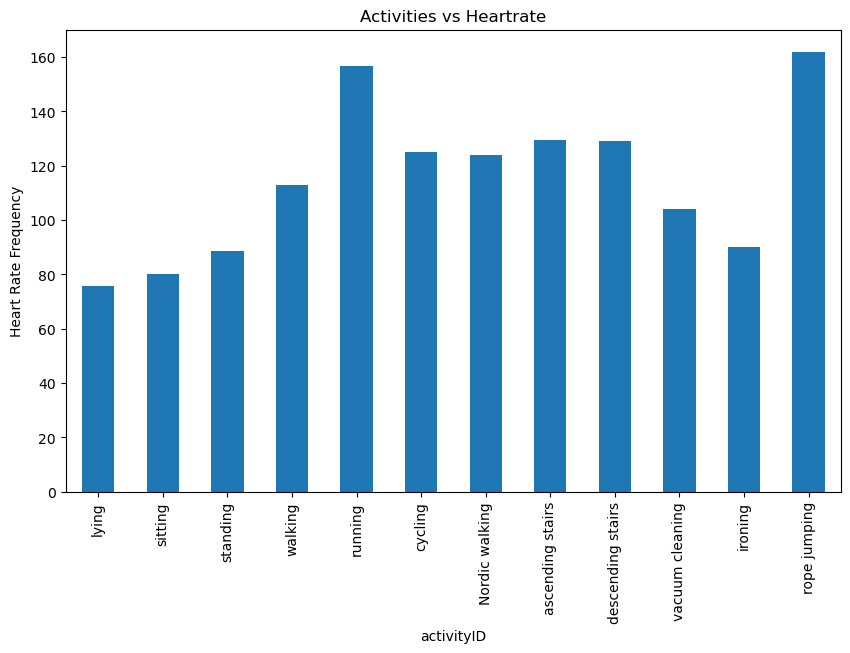

In [26]:
# Barchart of activities and Heartrate

activity_distribution = df['heartrate'].groupby(by=df['activityID']).mean()
activity_distribution.index = activity_distribution.index.map(actvity_id)
fig, ax = plt.subplots(figsize=(10,6))
activity_distribution.plot(kind = 'bar')
plt.title('Activities vs Heartrate')
plt.ylabel('Heart Rate Frequency')
plt.plot()
plt.show()

#sns.barplot(x='activityID', y='heartrate', data=activity_distribution)

With heart rates exceeding 150 bpm, the bar graph indicates that running and rope jumping are the most difficult exercises, while cycling and stair climbing may be defined as moderate. Heart rate ranges from 70 to 80 beats per minute, with sitting and reclining being the least stressful.

### SUBJECT ANALYSIS

In this subsection, I analysed the users / subjects with the timestamp of the activities they performed. I first of all define a plot function to enable me create plots more eaaily.

In [27]:
data

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subjectID
0,15.47,0,141.0,24.7500,-9.98278,2.61759,2.46038,-10.23410,2.69055,2.45977,0.042973,-0.042494,0.026166,51.6354,3.95346,-11.2478,0.648930,-0.503093,-0.354745,0.447151,31.875,-0.268179,9.90328,-3.363470,-0.361910,9.84957,-3.207960,-0.085279,0.012210,-0.018408,16.0398,-30.1135,32.8460,0.512364,-0.741783,-0.360678,-0.239067,31.1875,10.73090,2.486290,-1.34938,10.67780,1.724670,-1.264550,0.714237,-0.235885,-0.341782,-44.2263,-10.28570,7.363410,0.466904,-0.486197,0.608846,-0.418234,9
1,15.48,0,NaN,24.7500,-9.75577,2.46441,2.50279,-9.96280,2.56789,2.58057,0.041071,-0.092729,-0.004726,51.6326,4.32573,-11.5125,0.648978,-0.503015,-0.354371,0.447465,31.875,-0.308680,9.86522,-3.441520,-0.421590,9.94029,-3.222450,-0.110942,-0.133588,0.077265,16.8170,-30.2710,32.7113,0.513060,-0.741768,-0.359856,-0.238857,31.1875,11.70720,1.832730,-1.10377,10.94950,2.481290,-1.011130,0.238571,-0.279597,-0.536439,-44.3354,-10.79310,8.072780,0.466590,-0.488971,0.607694,-0.417024,9
2,15.49,0,NaN,24.7500,-10.32720,2.43953,3.45650,-9.96105,2.44737,2.91305,0.093355,-0.067072,-0.017420,52.1295,4.17528,-11.2501,0.648709,-0.503316,-0.354256,0.447606,31.875,-0.382124,10.05420,-3.366030,-0.467637,9.88014,-3.313020,-0.015485,-0.138495,0.085192,15.9103,-30.3669,33.1285,0.512982,-0.742123,-0.359267,-0.238809,31.1875,10.62840,-0.699382,-1.71655,11.53580,1.468270,-0.829364,-0.122434,-0.307176,-0.737734,-44.4643,-10.65750,8.214000,0.466964,-0.492189,0.607102,-0.413669,9
3,15.50,0,NaN,24.7500,-10.99920,2.29537,3.71633,-10.53000,2.45190,3.36664,0.033802,-0.132737,-0.025331,51.6370,4.07721,-11.6422,0.648810,-0.503072,-0.353799,0.448097,31.875,-0.818565,9.75937,-2.637280,-0.676405,9.91042,-3.039640,-0.009435,-0.125746,0.032065,16.3053,-30.6392,32.8508,0.513152,-0.742321,-0.358832,-0.238482,31.1875,8.55014,-3.228310,-1.95371,10.27120,-1.013130,-1.329260,-0.347597,-0.349365,-0.938808,-44.2026,-11.18680,7.790040,0.468730,-0.494896,0.606311,-0.409581,9
4,15.51,0,NaN,24.7500,-10.88630,1.83990,3.79653,-11.07110,2.25982,3.73003,-0.025960,-0.156064,-0.014331,52.2538,4.41657,-11.6455,0.649079,-0.502683,-0.353503,0.448377,31.875,-1.338300,9.38787,-2.142110,-1.035580,9.71431,-2.524220,0.025281,-0.080733,-0.099962,16.4438,-30.5146,32.1460,0.513730,-0.741738,-0.359575,-0.237934,31.1875,8.64873,-3.529240,-2.37532,8.58616,-3.176940,-1.782540,-0.469862,-0.457702,-1.059880,-43.4225,-11.86940,7.793570,0.469978,-0.497652,0.605975,-0.405287,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8472,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,1.784060,0.087985,0.934673,21.1701,-35.38780,-34.0443,0.558630,-0.593878,0.292228,0.499844,32.375,2.926640,10.21030,-0.983335,3.125630,10.62120,0.642058,-0.034671,-0.222172,-0.191336,15.5991,-40.9116,14.9966,0.625172,-0.760781,-0.039443,-0.169753,31.5000,9.38737,-0.565040,-3.27370,9.09401,-0.228554,-2.687700,-0.037788,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,0.598531,0.033615,0.799791,-0.031075,9
8473,100.20,0,NaN,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,4.43102,1.475210,-0.028917,0.806540,20.7931,-34.99540,-34.1772,0.555545,-0.596490,0.2

In [28]:
# Function to create plots

def pd_fast_plot(pd,column_a,column_b,title, figsize=(10,6)):
    plt.rcParams.update({'font.size': 16})
    size = range(len(pd))
    f, ax = plt.subplots(figsize=figsize) 
    plt.bar(size, pd[column_a], color=plt.cm.Paired(size))
    a = ax.set_xticklabels(pd[column_b], rotation = (90))
    b = ax.legend(fontsize = 20)
    c = ax.set_xticks(np.arange(len(pd)))
    d = ax.set_title(title)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


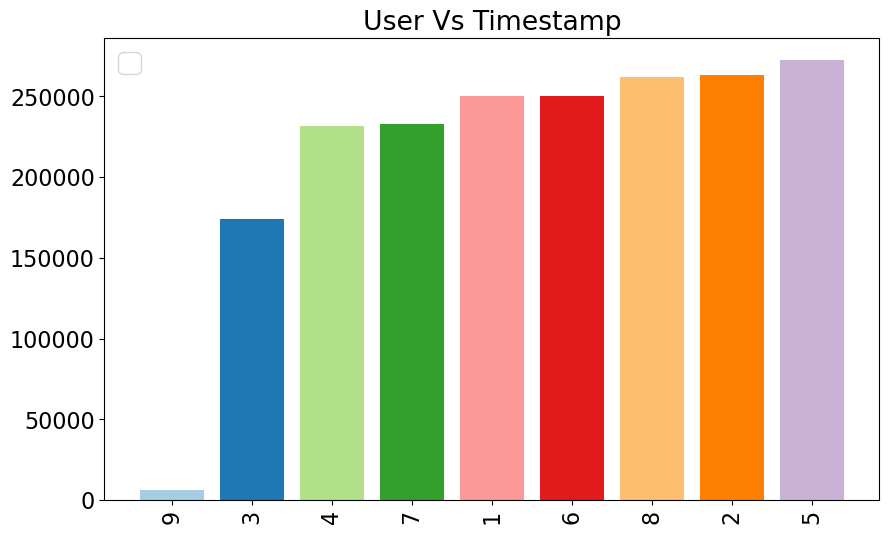

In [29]:
#Get required data and plot with defined function

sample = df.groupby(['subjectID']).count().reset_index()
sample_to_subject = pd.DataFrame()
sample_to_subject['id'] = sample['subjectID']
sample_to_subject['sample'] = sample['timestamp']
sample_to_subject = sample_to_subject.sort_values(by=['sample'])
pd_fast_plot(sample_to_subject,'sample','id','User Vs Timestamp')

According to the bar graph above, user 9 performed the least well that was recorded. This might have happened as a result of a machine error. The data related to this issue have to be taken out of consideration since it could influence the analysis's findings. However, the most activity that has been shown belongs to user 5. 

Below, I visualized the activities performed by the varying timestamp to understand what activities were performed most by the subjects. It is clear and quite normal to see that walking had the highest timestamp as most of human activities involve walking. Rope jumping had the lowest timestamp and is hence, the least performed activity by the subjects.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1942872 entries, 0 to 1942871
Data columns (total 43 columns):
 #   Column            Dtype  
---  ------            -----  
 0   timestamp         float64
 1   activityID        int64  
 2   heartrate         float64
 3   handTemperature   float64
 4   handAcc16_1       float64
 5   handAcc16_2       float64
 6   handAcc16_3       float64
 7   handAcc6_1        float64
 8   handAcc6_2        float64
 9   handAcc6_3        float64
 10  handGyro1         float64
 11  handGyro2         float64
 12  handGyro3         float64
 13  handMagne1        float64
 14  handMagne2        float64
 15  handMagne3        float64
 16  chestTemperature  float64
 17  chestAcc16_1      float64
 18  chestAcc16_2      float64
 19  chestAcc16_3      float64
 20  chestAcc6_1       float64
 21  chestAcc6_2       float64
 22  chestAcc6_3       float64
 23  chestGyro1        float64
 24  chestGyro2        float64
 25  chestGyro3        float64
 26  chestMagne1   

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


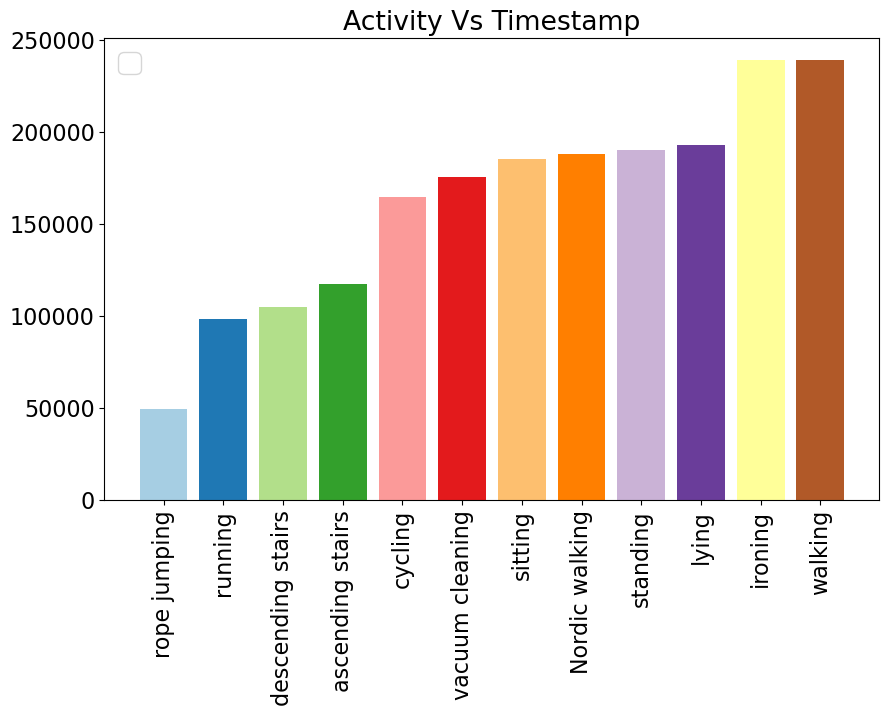

In [31]:
#Get required data and plot with defined function

sample = df.groupby(['activityID']).count().reset_index()
sample_to_subject = pd.DataFrame()
sample_to_subject['activityID'] = [actvity_id[x] for x in sample['activityID']]
sample_to_subject['sample'] = sample['timestamp']
sample_to_subject = sample_to_subject.sort_values(by=['sample'])
pd_fast_plot(sample_to_subject,'sample','activityID','Activity Vs Timestamp')

### TEMPERATURE ANALYSIS

I analysed the average temperature readings taken from each subject's hand, chest, and ankle in this subsection. The hand had the lowest reported temperature overall, while the chest had the highest. 
As we approach subject 9, we can notice a decrease in temperature across all three data. The previous plot, User vs. Timestamp, which revealed subject 9 had the least amount of recorded activity, helps to explain this. As appears seen in the line plot below, it is expected that this subject would have the lowest recorded temperature and so divert from the typical pattern. The highest recorded temperature was detected in subject 5's hand and chest, and the highest recorded temperature was recorded in subject 6's ankle.

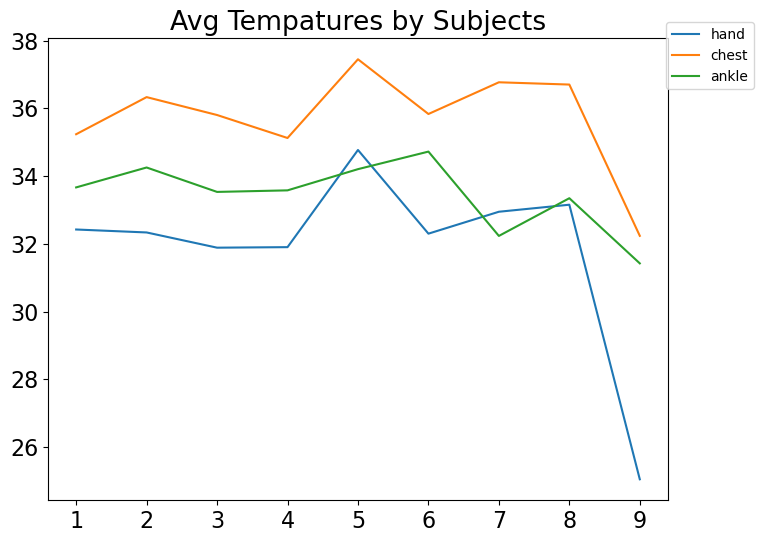

In [32]:
#Get required data and plot

result_id = df.groupby(['subjectID']).mean().reset_index()
sample_temp = pd.DataFrame()
sample_temp['hand'] = result_id['handTemperature']
sample_temp['chest'] = result_id['chestTemperature']
sample_temp['ankle'] = result_id['ankleTemperature']

ax = sample_temp.plot(kind='line', figsize=(8,6), title='Avg Tempatures by Subjects')
a = ax.set_xticklabels(result_id['subjectID'])
b = ax.legend(fontsize = 10, bbox_to_anchor=(1.15, 1.05))
c = ax.set_xticks(np.arange(len(sample_temp)))

Here, I analysed the tasks that were performed and the temperature that was recorded. Running and rope jumping have three recoded patterns of temperature that are all lower than the other. This is not surprising because, as the plot Activity vs. Timestamp shows, running and rope jumping have the lowest timestamps, indicating that there are not many data points available for these activities. It might have been because the subjects didn't perform the exercise frequently or because one of the machines stopped while they were doing it.

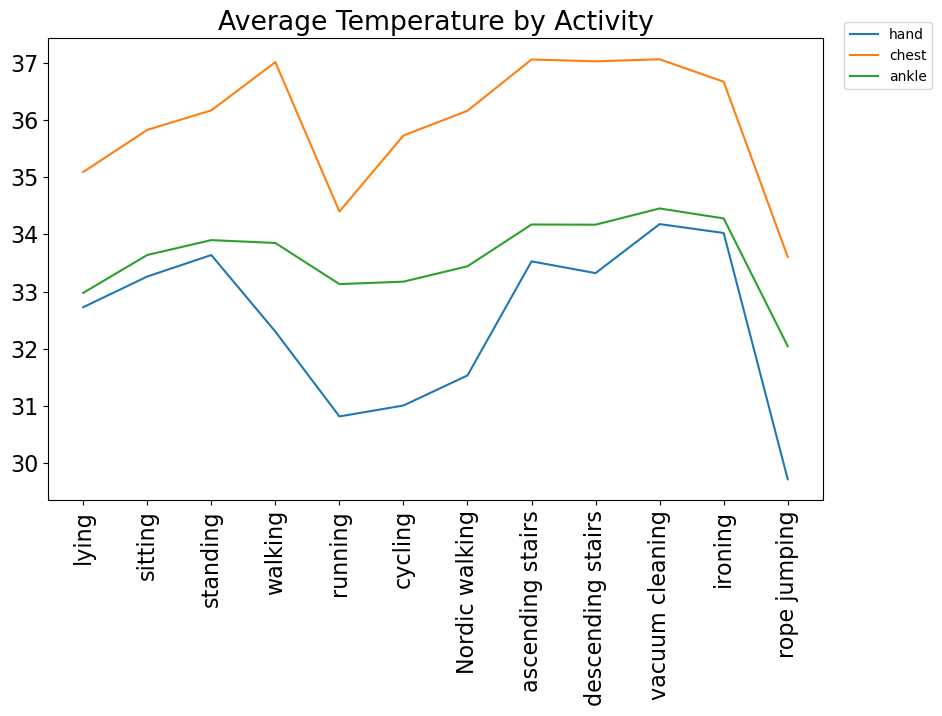

In [33]:
#Get required data and plot

result_act = df.groupby(['activityID']).mean().reset_index()
sample_temperature = pd.DataFrame()
sample_temperature['activity'] = [actvity_id[x] for x in result_act['activityID']]
sample_temperature['hand'] = result_act['handTemperature']
sample_temperature['chest'] = result_act['chestTemperature']
sample_temperature['ankle'] = result_act['ankleTemperature']

ax = sample_temperature.plot(kind='line', figsize=(10,6), title='Average Temperature by Activity')
a = ax.set_xticklabels(sample_temperature['activity'], rotation =90)
b = ax.legend(fontsize = 10, bbox_to_anchor=(1.15, 1.05))
c = ax.set_xticks(np.arange(len(sample_temperature)))

### SENSOR ANALYSIS

I analysed the acceleration that the individuals' sensors registered in this portion. The individuals appear to show a consistent pattern in the hand, chest, and ankle acceleration data obtained by the sensors. As we approached subject 8, the hand acceleration trend recorded by sensor 'handAcc16_2', however, shows a significant drop. Is it possible that the sensor malfunctioned and did this?

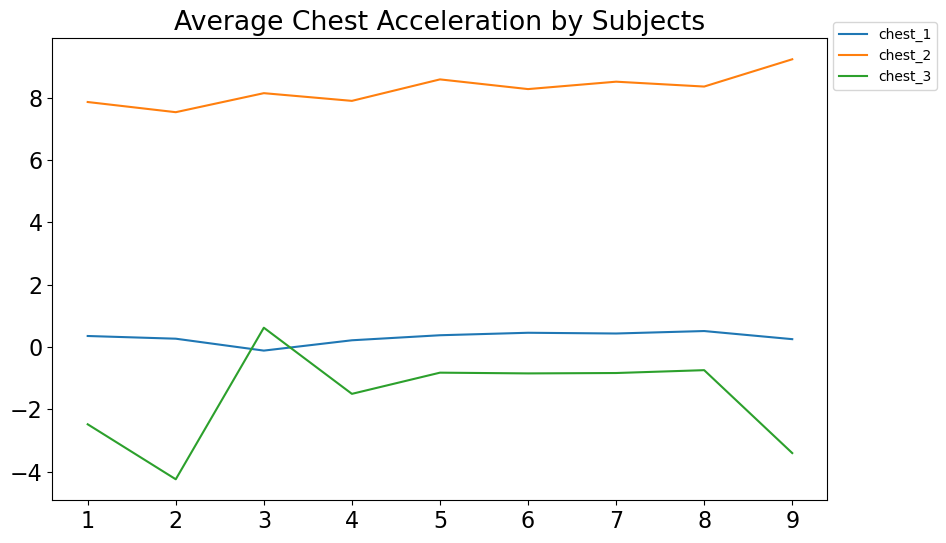

In [34]:
#Get required data and plot

samp = pd.DataFrame()
samp['chest_1'] = result_id['chestAcc16_1']
samp['chest_2'] = result_id['chestAcc16_2']
samp['chest_3'] = result_id['chestAcc16_3']
ax = samp.plot(kind='line', figsize=(10,6), title='Average Chest Acceleration by Subjects')
a = ax.set_xticklabels(result_id['subjectID'])
b = ax.legend(fontsize = 10, loc=1, bbox_to_anchor=(1.15, 1.05))
c = ax.set_xticks(np.arange(len(samp)))

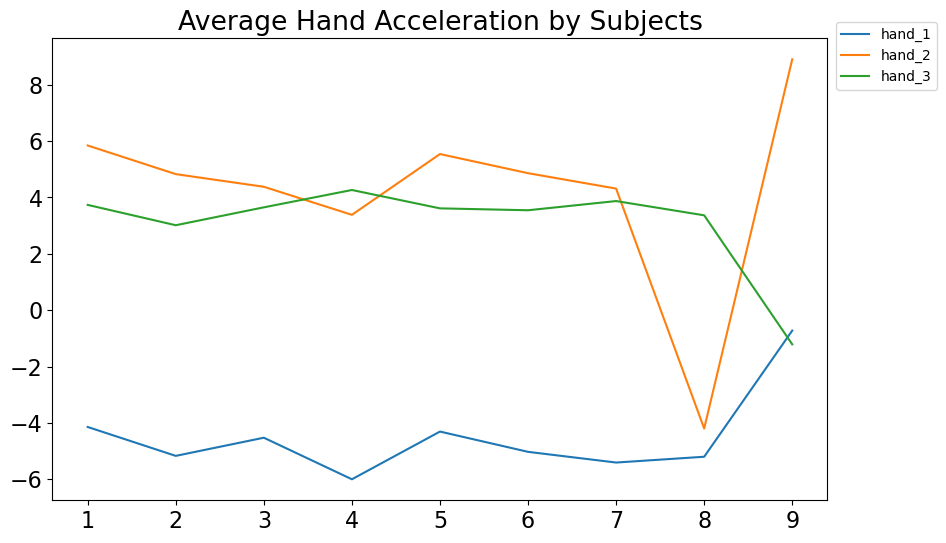

In [35]:
#Get required data and plot

samp = pd.DataFrame()
samp['hand_1'] = result_id['handAcc16_1']
samp['hand_2'] = result_id['handAcc16_2']
samp['hand_3'] = result_id['handAcc16_3']
ax = samp.plot(kind='line', figsize=(10,6), title='Average Hand Acceleration by Subjects')
a = ax.set_xticklabels(result_id['subjectID'])
b = ax.legend(fontsize = 10, loc=1, bbox_to_anchor=(1.15, 1.05))
c = ax.set_xticks(np.arange(len(samp)))

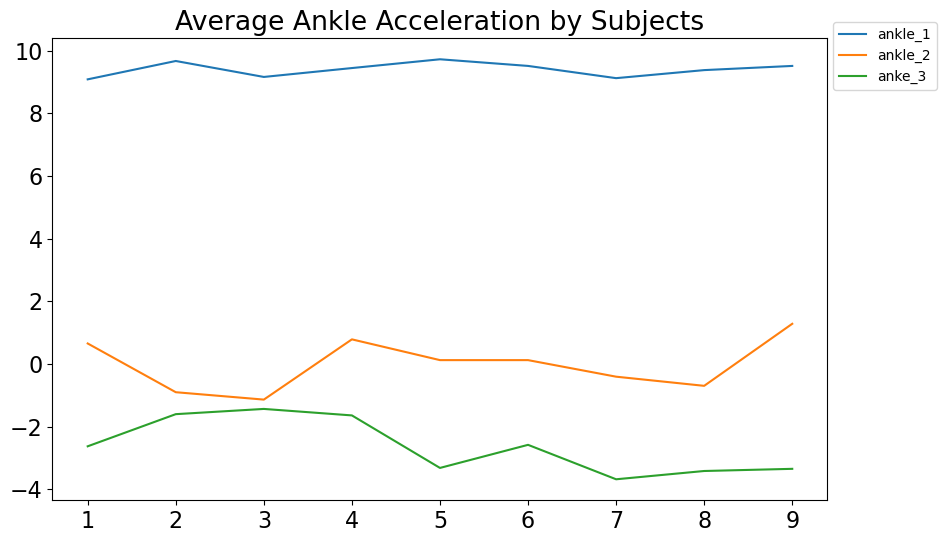

In [36]:
#Get required data and plot

samp = pd.DataFrame()
samp['ankle_1'] = result_id['ankleAcc16_1']
samp['ankle_2'] = result_id['ankleAcc16_2']
samp['anke_3'] = result_id['ankleAcc16_3']
ax = samp.plot(kind='line', figsize=(10,6), title='Average Ankle Acceleration by Subjects')
a = ax.set_xticklabels(result_id['subjectID'])
b = ax.legend(fontsize = 10, loc=1, bbox_to_anchor=(1.15, 1.05))
c = ax.set_xticks(np.arange(len(samp)))


### DATA SPLITTING

Before doing more analysis, I split the dataset 70:30. thirty percent of the data would be used for testing, while the remaining seventy percent would be used for training and hypothesis testing. This is done to prevent data leaks, which could lead to the creation of a biased model that fails in response to new data.

In [37]:
df

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subjectID
0,37.66,1,100.0,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,0.037579,-0.011145,8.93200,-67.9326,-19.9755,32.1875,0.124482,9.65003,-1.65181,0.143941,9.71019,-1.47347,0.036668,0.016559,-0.052791,0.567566,-50.7269,44.2728,30.75,9.73855,-1.84761,0.095156,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.863600,-58.369600,1
1,37.67,1,100.0,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,0.025479,-0.009538,9.58300,-67.9584,-20.9091,32.1875,0.200711,9.64980,-1.65043,0.129092,9.74041,-1.47329,0.019343,-0.024304,-0.059843,0.904990,-50.5080,43.5427,30.75,9.69762,-1.88438,-0.020804,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.319700,-58.365600,1
2,37.68,1,100.0,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,0.011214,0.000831,9.05516,-67.4017,-19.5083,32.1875,0.270277,9.72331,-1.88174,0.144685,9.77048,-1.41285,-0.001428,0.038466,-0.046464,0.455480,-50.7209,44.0259,30.75,9.69633,-1.92203,-0.059173,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.784200,-58.611900,1
3,37.69,1,100.0,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,0.019053,0.013374,9.92698,-67.4387,-20.5602,32.1875,0.236737,9.72447,-1.72746,0.174402,9.75538,-1.45841,0.017277,-0.048547,-0.074946,0.324284,-50.1544,43.6570,30.75,9.66370,-1.84714,0.094385,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.102800,-57.879900,1
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,32.1875,0.352225,9.72437,-1.68665,0.173568,9.69512,-1.53414,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.9228,30.75,9.77578,-1.88582,0.095775,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.122500,-57.884700,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942867,95.06,24,162.0,25.125,4.99466,6.01881,5.59830,4.90787,6.05780,5.68357,-0.289166,-0.110170,0.238570,-4.79353,-18.1271,-48.2695,32.3750,-0.385331,9.42255,-2.12496,-0.567952,9.48622,-2.05921,-0.147595,-0.137509,0.066513,20.755500,-35.3089,25.0120,31.50,9.40727,-2.24401,-2.259740,9.41274,-2.26922,-1.759580,0.021288,-0.012885,0.005878,-45.7855,-0.831734,-0.170139,9
1942868,95.07,24,162.0,25.125,5.02764,5.90369,5.48372,4.89090,5.95209,5.56301,-0.275411,-0.128358,0.267409,-4.54101,-18.0169,-48.9268,32.3750,-0.273773,9.23341,-2.19977,-0.599929,9.24488,-2.12017,-0.086293,-0.147603,0.048090,20.887800,-34.9263,24.4467,31.50,9.36745,-2.28110,-2.337100,9.33733,-2.23908,-1.834950,0.010715,0.003629,-0.004235,-46.0331,-0.817288,0.538134,9
1942869,95.08,24,162.0,25.125,5.06409,5.71370,5.48491,4.97981,5.87584,5.45738,-0.289885,-0.126548,0.281483,-4.17401,-17.9121,-48.4032,32.3750,-0.235260,9.38390,-2.19956,-0.464395,9.19919,-2.04556,-0.022543,-0.114693,0.083471,21.138800,-34.8069,24.7298,31.50,9.36765,-2.24313,-2.337340,9.32243,-2.23905,-1.804610,-0.016939,-0.035176,-0.002309,-45.5140,-1.229410,0.540438,9
1942870,95.09,24,162.0,25.125,5.13914,5.63724,5.48629,4.97690,5.69448,5.29167,-0.234417,-0.101485,0.275497,-4.66091,-18.2588,-49.0563,32.3750,-0.125392,9.42016,-2.35257,-0.403390,9.27444,-1.98526,-0.017380,-0.116692,0.099091,20.507600,-35.1701,24.3045,31.50,9.44470,-2.24425,-2.259360,9.38220,-2.26938,-1.880500,-0.028069,-0.036457,-0.007076,-45.9093,-0.565555,0.680109,9


In [38]:
#Split data

train_data = df.iloc[:int(df.shape[0]*0.7)]
test_data = df.iloc[int(df.shape[0]*0.7):]

### CORRELATION

Correlation is any statistical relationship between two random variables. Correlations are useful because they can indicate a predictive relationship that can be exploited. . Here, I calculate the pairwise correlation of columns using the pandas correlation function (method = pearson). The result is the table below, which does not first look to be very clear. To further show whether there are connections between our data and to look for errors, I use Seaborn's heatmap plot to build a heat map.

In [39]:
# Compute correlation

df_corr = train_data.corr()
df_corr = df_corr.drop(['activityID'], axis = 1)
df_corr

,timestamp,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subjectID
timestamp,1.000000,0.796079,-0.486137,-0.377472,0.109490,-0.218422,-0.386643,0.113520,-0.229087,0.032345,0.030115,0.006709,0.336052,-0.174538,0.105203,-0.030380,-0.038901,0.145357,-0.507712,-0.035260,0.146760,-0.509921,0.005687,0.017458,-0.009098,-0.201055,-0.347600,0.531180,-0.114561,0.347728,0.290247,-0.012632,0.357588,0.312453,-0.017862,-0.010433,-0.053024,0.001998,-0.285789,-0.318412,-0.040645,-0.136075
activityID,0.209103,0.298591,0.155399,-0.175530,0.093864,-0.141014,-0.174880,0.094950,-0.141764,0.030296,0.029155,0.003586,0.045201,-0.268908,0.015316,0.164152,-0.210701,0.109682,-0.448345,-0.208493,0.108103,-0.448959,0.001684,-0.018668,-0.000013,-0.248494,-0.297792,0.275953,0.208630,0.151769,0.147106,0.083457,0.157824,0.156203,0.092577,-0.001602,0.012536,0.001387,-0.185861,-0.041697,0.237223,-0.001908
heartrate,0.796079,1.000000,-0.352506,-0.365052,0.122778,-0.247507,-0.372485,0.127449,-0.256475,0.031601,0.039855,0.003076,0.350727,-0.197813,0.125307,-0.064055,-0.020550,0.158380,-0.437037,-0.018825,0.160584,-0.439813,0.007133,0.015210,-0.020090,-0.200332,-0.428134,0.480507,-0.081759,0.307089,0.290127,-0.038142,0.315028,0.312213,-0.045689,-0.006633,-0.033239,0.005497,-0.328235,-0.352842,-0.068748,-0.251967
handTemperature,-0.486137,-0.352506,1.000000,0.096135,0.021213,0.065248,0.109869,0.020106,0.082396,-0.028880,-0.000576,0.001893,-0.145214,-0.068328,-0.026703,0.734307,-0.010713,0.058846,0.107579,0.003059,0.056180,0.116501,0.000181,-0.003371,-0.006466,0.004140,-0.010136,-0.174127,0.624917,-0.054144,-0.076927,-0.060543,-0.053083,-0.083669,-0.060225,0.007536,0.038672,0.001615,0.102368,0.140481,0.145841,0.389066
handAcc16_1,-0.377472,-0.365052,0.096135,1.000000,-0.077490,0.212970,0.986960,-0.089135,0.214057,0.046678,-0.037210,0.032838,-0.518759,0.093425,-0.242497,-0.187240,0.043152,-0.430926,0.497796,0.039473,-0.433302,0.497404,-0.059644,-0.071407,0.071948,0.263982,0.349883,-0.388107,-0.220988,-0.345562,-0.198295,-0.010994,-0.366401,-0.217576,-0.012830,0.031106,-0.007046,0.118564,0.108889,0.276390,-0.094157,0.002197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ankleGyro3,0.001998,0.005497,0.001615,0.118564,-0.031735,0.035388,0.103156,-0.012398,0.042384,0.124396,-0.017331,-0.196840,0.081460,0.059810,0.021489,0.004769,-0.048028,-0.150395,0.093441,-0.046750,-0.130985,0.086330,-0.065658,-0.113531,0.255000,0.000782,-0.005391,0.001521,0.002274,-0.048751,0.151548,-0.056544,-0.088136,0.089343,-0.048424,0.283497,-0.033444,1.000000,-0.008388,0.011639,-0.020888,0.001606
ankleMagne1,-0.285789,-0.328235,0.102368,0.108889,-0.061735,0.061414,0.110702,-0.064572,0.063227,0.016898,-0.017855,-0.080413,-0.027476,0.295467,0.133976,0.038700,0.009636,-0.111577,0.234638,0.008347,-0.111666,0.234829,0.008786,-0.052408,0.040636,0.163562,0.572144,-0.153672,0.036632,-0.212621,-0.147161,-0.002082,-0.214474,-0.156621,-0.002586,-0.018788,0.013130,-0.008388,1.000000,0.047348,-0.047180,0.249602
ankleMagne2,-0.318412,-0.352842,0.140481,0.276390,-0.053699,0.124558,0.281894,-0.056051,0.129773,-0.046725,-0.033634,0.120233,-0.381928,0.105439,-0.294922,0.001091,0.035901,-0.198346,0.325808,0.033975,-0.202641,0.327870,-0.003803,0.058369,-0.009743,0.303769,0.205729,-0.622619,-0.001743,-0.136207,-0.081053,-0.067471,-0.140666,-0.085780,-0.076008,0.048790,-0.051950,0.011639,0.047348,1.000000,0.004618,0.105299
ankleMagne3,-0.040645,-0.068748,0.145841,-0.094

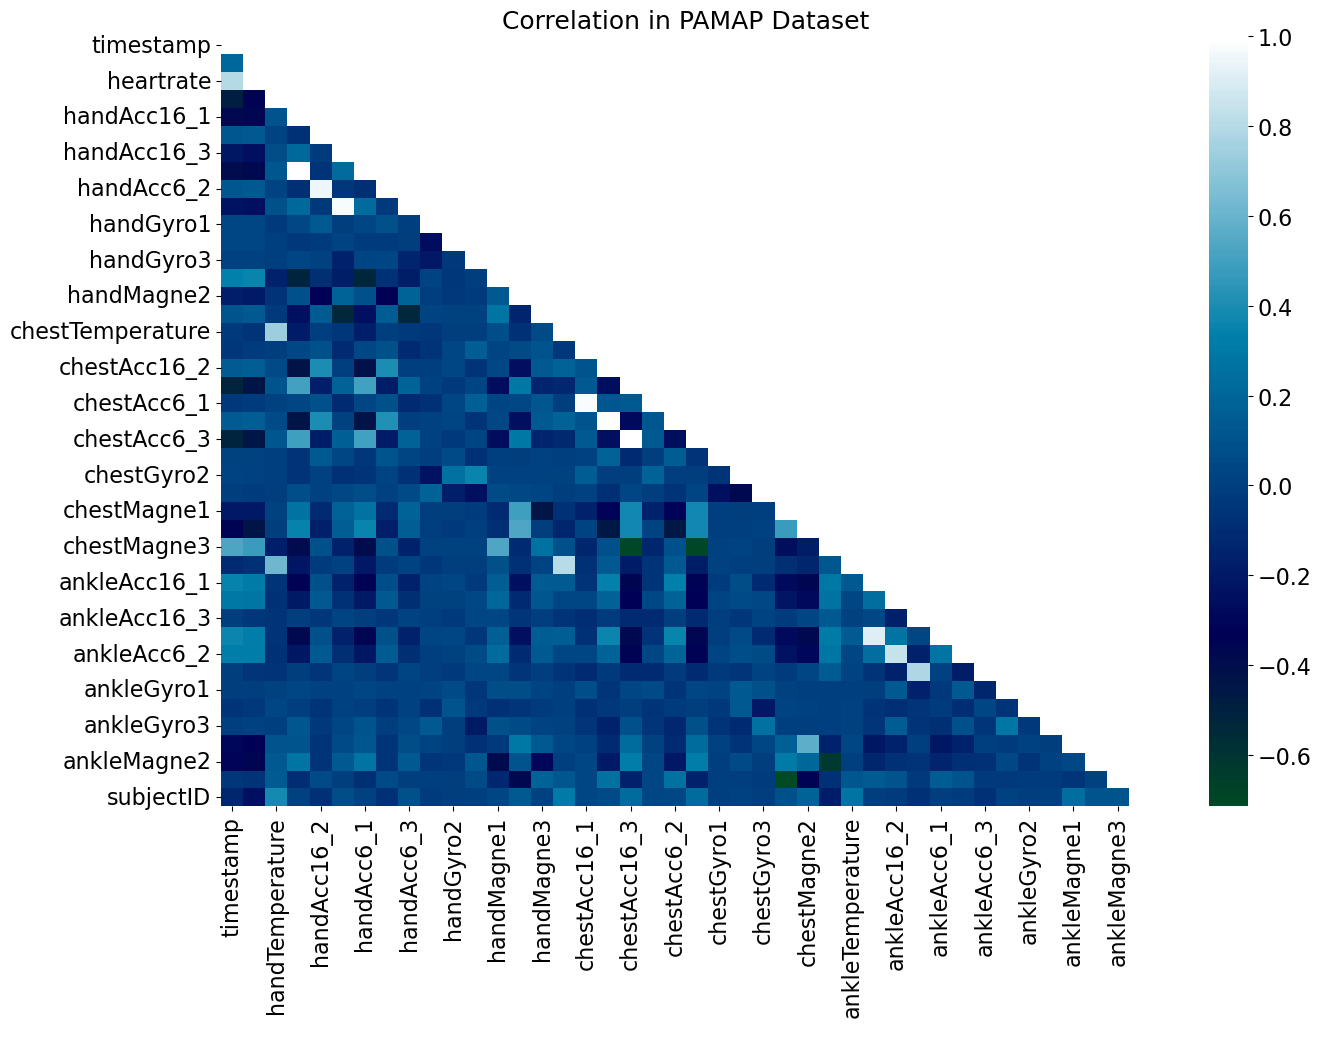

In [40]:
# Heatmap Plot

f, ax = plt.subplots(figsize=(15, 10))
mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, mask=mask, vmax=1,center=0, cmap = 'ocean', annot = False)
plt.title('Correlation in PAMAP Dataset', fontsize=18)
plt.xlabel(' ',)
plt.show()

Here, I calculated a pairwise relationship between the heartrate and other features in the dataset using the pandas corrwith function. With a correlation of 0.480, the chestMagne3 and heartrate have a positive relationship, while the chestAcc6_3 and heartrate have a negative correlation, with a value of -0.439.

In [41]:
# Feature correlation with heartrate

train_data.corrwith(train_data['heartrate']).sort_values(ascending = False)

heartrate       1.000000
timestamp       0.796079
chestMagne3     0.480507
handMagne1      0.350727
ankleAcc6_1     0.315028
                  ...   
handAcc16_1    -0.365052
handAcc6_1     -0.372485
chestMagne2    -0.428134
chestAcc16_3   -0.437037
chestAcc6_3    -0.439813
Length: 43, dtype: float64

### GROUP ACTIVITIES TO DATAFRAME
Before performing any hypothesis test, I grouped the activities into distinct dataframes:
- rigorous_activities
- moderate_activities
- light_activities

#### Rigorous Activity
* Running
* Rope jumping

In [42]:
running_df = train_data.query("activityID == 5")
running_df.head()

rope_jumping_df =train_data.query("activityID == 24")
rope_jumping_df.head()

rigorous_activities = pd.concat([running_df, rope_jumping_df])
rigorous_activities.shape

(89057, 43)

#### Moderate Activity
* Ascending stairs
* Descending stairs
* Cycling 
* Nordic walking
* Walking
* Vaccuum cleaning

In [43]:
asc_df = train_data.query("activityID == 12")
dsc_df =train_data.query("activityID == 13")
cyc_df = train_data.query("activityID == 6")
nor_df =train_data.query("activityID == 7")
wal_df = train_data.query("activityID == 4")

moderate_activities = pd.concat([asc_df, dsc_df, cyc_df, nor_df, wal_df])
moderate_activities.shape

(533493, 43)

#### Light Activity
* Lying
* Sitting 
* Standing 
* Ironing

In [44]:
ly_df = train_data.query("activityID == 1")
sit_df =train_data.query("activityID == 2")
stand_df = train_data.query("activityID == 3")
iron_df =train_data.query("activityID == 17")

light_activities = pd.concat([ly_df, sit_df, stand_df, iron_df])
light_activities.shape

(607951, 43)

### AVERAGE HEARTRATE FOR THE DIFFERENT ACTIVITIES

Here, I calculated the average heartrate for the different grouped activities. This will be used to develop and perform hypothesis testing.

#### AVERAGE HEARTRATE FOR RIGOROUS ACTIVITIES

In [45]:
rig_act_mean = rigorous_activities['heartrate'].mean()
rig_act_mean

157.35982107218842

#### AVERAGE HEARTRATE FOR MODERATE ACTIVITIES

In [46]:
mod_act_mean = moderate_activities['heartrate'].mean()
mod_act_mean

124.2781744402249

#### AVERAGE HEARTRATE FOR LIGHT ACTIVITIES

In [47]:
lig_act_mean = light_activities['heartrate'].mean()
lig_act_mean

86.06817950817472

### FILTER ACTIVITIES FROM TEST DATA

Here, I grouped the activities in the test data into rigorous activities, moderate activities and light activities as I did with the train data

#### RIGOROUS ACTIVITIES FROM TEST DATA

In [48]:
test_data.shape

(582862, 43)

In [49]:
running_df2 = test_data.query("activityID == 5")
rope_jumping_df2 =test_data.query("activityID == 24")

rigorous_activities2 = pd.concat([running_df2, rope_jumping_df2])
rigorous_activities2.shape

(58502, 43)

In [50]:
rigorous_activities2['heartrate'].mean()

159.97166763529452

#### MODERATE ACTIVITIES FROM TEST DATA

In [51]:
asc_df2 = test_data.query("activityID == 12")
dsc_df2 =test_data.query("activityID == 13")
cyc_df2 = test_data.query("activityID == 6")
nor_df2 =test_data.query("activityID == 7")
wal_df2 = test_data.query("activityID == 4")

moderate_activities2 = pd.concat([asc_df2, dsc_df2, cyc_df2, nor_df2, wal_df2])
moderate_activities2.shape

(280135, 43)

In [52]:
moderate_activities2['heartrate'].mean()

118.56156358678716

#### LIGHT ACTIVITIES FROM TEST DATA

In [53]:
ly_df2 = test_data.query("activityID == 1")
sit_df2 =test_data.query("activityID == 2")
stand_df2 = test_data.query("activityID == 3")
iron_df2 =test_data.query("activityID == 17")

light_activities2 = pd.concat([ly_df2, sit_df2, stand_df2, iron_df2])
light_activities2.shape

(198381, 43)

In [54]:
light_activities2['heartrate'].mean()

77.38483440114393

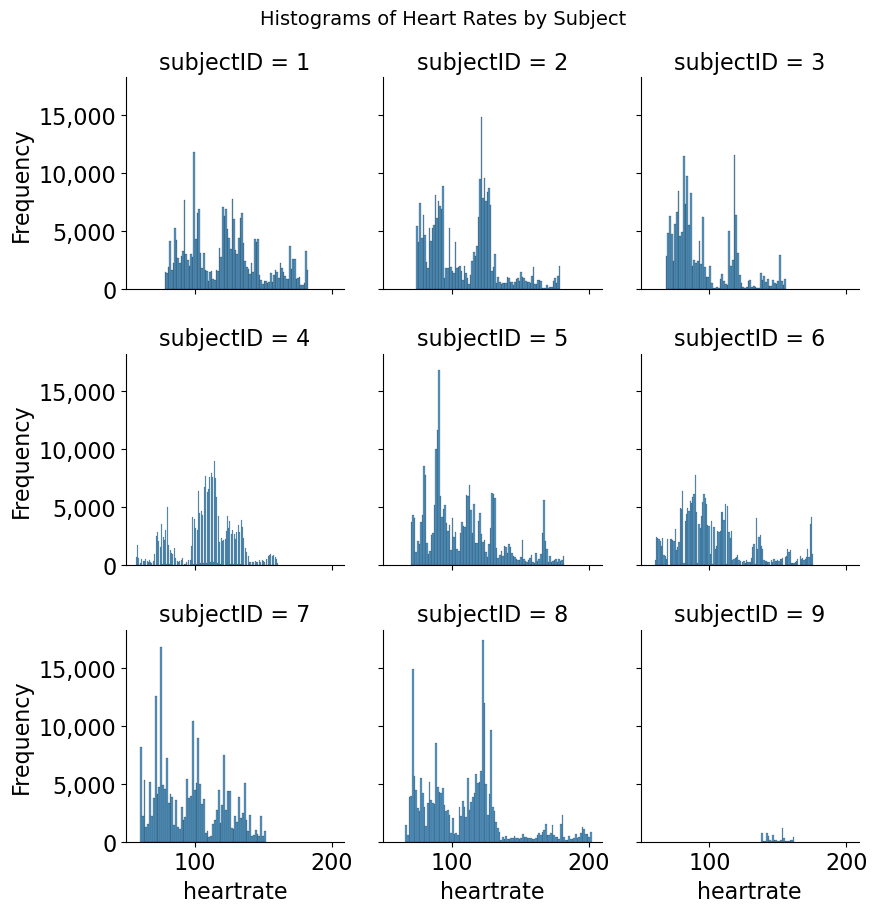

In [55]:
a = sns.FacetGrid(df[['subjectID','heartrate']],col='subjectID',col_wrap=3)
a.map(sns.histplot,"heartrate");
a.set_axis_labels("heartrate","Frequency")

a.fig.suptitle('Histograms of Heart Rates by Subject',x=0.5,y=1.02,fontsize=14)

for ax in a.axes.flat:
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, p: f'{y:,.0f}'.format(y)))

This plot shows the heart rate histograms of the people, some of which show twin peaks. The heart rates for subjects 101, 102, 103, 104, and 108 are represented by multiple time stamps that are separated by a significant amount of margin. This could mean that people's heart rates are higher during physically demanding tasks and similar during quiet or inactive states of mind. Subject 109 is notable since it has fewer readings than the rest.

## 5. HYPOTHESIS TESTING

To determine if the available data supports a specific hypothesis, a statistical hypothesis test is a technique of statistical inference. We are able to state population parameters in a probabilistic method through hypothesis testing.

The set of hypotheses that will be evaluated is based on the finding made during the initial analysis of the data that the heartrate information can perhaps permit the classification of activities. We will test two hypotheses regarding the mean heartrate data for each activity classification in order to determine the accuracy of this evaluation.


---
### HYPOTHESIS 1
---
### HYPOTHESIS STATEMENT

**If** there is a relationship between *activities performed* and *heartrate*, **then**, moderate activities will result in a higher heartrate than lighter activities

- Independent Variable : *activityID*
- Dependent Variable : *heartrate*

> Null hypothesis ($H_0$) : The average heart rate for moderate activities is the same as the average for light activities.

> Alternative hypothesis ($H_1$) : The average heart rate for moderate tasks differs significantly from the average for light activities.

$H_0$ : x = 124.27

$H_1$ : x > 124.27

Where x is the mean heartrate of moderate activities.

*alpha level = 0.05*

If p-value < 0.05 : I reject null hypothesis
If p-value > 0.05 : I accept null hypothesis

### CALCULATE Z-SCORE

Z-score is a statistical measurement that describes a value's relationship to the mean of a group of values. Standard deviations from the mean are used to calculate the Z-score. The score of a data point is equal to the mean score if the Z-score is 0. Any value that deviates one standard deviation from the mean would have a Z-score of 1.0. Z-scores can be positive or negative; a positive value means the score is higher than the mean, while a negative value means it is lower.

**$z = (x - μ) / σ$**
     
Since there are many more people in our sample than 30, the Z-score is utilised in this case rather than the t-test.
I use the test data to get the Z-score and p-value after first calculating the statistics required to obtain the Z-score.

In [56]:
# Get statistics
# Mean
test_means = moderate_activities2['heartrate'].mean()
print('mean:', test_means)
print()

# Standard deviation
test_std = moderate_activities2['heartrate'].std()
print('std:', test_std)
print()

# Count
test_count = moderate_activities2['heartrate'].count()
print('count:', test_count)

mean: 118.56156358678716

std: 16.677299510588295

count: 280135


In [57]:
#Calculate the z-score
zscore = (test_means - mod_act_mean)/(test_std/np.sqrt(test_count))
print('z-score:', zscore)

# Get p_value
p_value_from_normal=1-stats.norm.cdf(zscore)
print(p_value_from_normal)
alpha = 5e-2

print('The Average is: ',test_means)
print()
if p_value_from_normal <= alpha:
    print("The p_value is:", p_value_from_normal, "Null hypothesis can be rejected")
else:
    print("The p_value is:", p_value_from_normal, "Null hypothesis cannot be rejected")  

z-score: -181.42477265898955
1.0
The Average is:  118.56156358678716

The p_value is: 1.0 Null hypothesis cannot be rejected


For the hypothesis test, the **p-value** is $1.0$, which is higher than the **alpha value** that was used in this research. Accordingly, the **Null hypothesis ($H_0$)** It is **accepted** that the average heart rate for moderate activities is the same as the average heart rate for light activities, and the alternative hypothesis ($H_1$): When the mean heart rate for moderate work deviates significantly from the mean heart rate for light tasks, it must to be ignored. 
Therefore, there is no discernible difference between the average heart rate for light and moderate exercises, per the test result.

## HYPOTHESIS 2
---

### HYPOTHESIS STATEMENT

**If** there is a relationship between *activities performed* and *heartrate*, **then**, rigorous activities will result in a higher heartrate than moderate activities

* Independent Variable : activityID
* Dependent Variable : heartrate

> Null hypothesis H_0 : The average heart rate for rigorous tasks is the same as the average for moderate (other) activities.

> Alternative hypothesis H_1 : The average heart rate for rigorous tasks differs significantly from the average for moderate (other) activities.

H_0 : x = 157.35

H_1 : x > 157.35

Where x is the mean heartrate of **rigorous activities**.

*alpha level = 0.05*

If p-value < 0.05 : I will reject null hypothesis
If p-value > 0.05 : I will accept null hypothesis

### CALCULATE Z-SCORE

As there are many more people in our sample than 30, the Z-score is used in this case instead of the t-test.
I used the test data to get the Z-score and p-value after first calculating the statistics required to obtain the Z-score.

In [58]:
test_means = rigorous_activities2['heartrate'].mean()
print('mean is :', test_means)
print()

test_std = rigorous_activities2['heartrate'].std()
print('std is :', test_std)

# Count
test_count = rigorous_activities2['heartrate'].count()
print('count is :', test_count)

mean is : 159.97166763529452

std is : 26.330938461932032
count is : 58502


In [59]:
#Calculate the z-score
zscore = (test_means - rig_act_mean)/(test_std/np.sqrt(test_count))
print('z-score is :', zscore)

# Get p_value
p_value_from_normal = 1 - stats.norm.cdf(zscore)
print(p_value_from_normal)
alpha = 5e-2

print('The Average is: ',test_means)
print()
if p_value_from_normal <= alpha:
    print("The p_value is:", p_value_from_normal, "Null hypothesis can be rejected")
else:
    print("The p_value is:", p_value_from_normal, "Null hypothesis cannot be rejected")  

z-score: 23.992012483740865
0.0
The Average is:  159.97166763529452

The p_value is: 0.0 Null hypothesis can be rejected


The resulting **p-value** from this hypothesis test is $0.0$  which is less than the **alpha value** $0.05$ used for this test. This means the Null hypothesis ($H_0$) : The average heart rate for rigorous tasks is the same as the average for moderate (other) activities must rejected and the **Alterantive hypothesis ($H_1$)** : The average heart rate for rigorous tasks differs significantly from the average for moderate (other) activities must be **accepted**. 
Hence, according to the result from the test, there is indeed a significant difference in the average heartrate for rigorous activities and other activities. The average heartrate for rigorous activities is expected to be higher than other activities.

## 6. MODELLING

To improve the accuracy of the model, I need to eliminate some variables. Those variables are subjectID and timestamp. As these are numerical values which will make the algorithm empoly in its calculations whose values have no significance. Which will eventually throw errors and inaccurate prediction.

#### DROP UNNECESSARY FEATURES

In [72]:
# Drop timestamp and subject_id features

df_train = train_data.drop(['timestamp', 'subjectID'], axis=1)
df_test = test_data.drop(['timestamp', 'subjectID'], axis=1)
df_train.head(3)

,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3
0,1,100.0,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,0.037579,-0.011145,8.93200,-67.9326,-19.9755,32.1875,0.124482,9.65003,-1.65181,0.143941,9.71019,-1.47347,0.036668,0.016559,-0.052791,0.567566,-50.7269,44.2728,30.75,9.73855,-1.84761,0.095156,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696
1,1,100.0,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,0.025479,-0.009538,9.58300,-67.9584,-20.9091,32.1875,0.200711,9.64980,-1.65043,0.129092,9.74041,-1.47329,0.019343,-0.024304,-0.059843,0.904990,-50.5080,43.5427,30.75,9.69762,-1.88438,-0.020804,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656
2,1,100.0,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,0.011214,0.000831,9.05516,-67.4017,-19.5083,32.1875,0.270277,9.72331,-1.88174,0.144685,9.77048,-1.41285,-0.001428,0.038466,-0.046464,0.455480,-50.7209,44.0259,30.75,9.69633,-1.92203,-0.059173,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119


#### SCALING

Some data contains outliers, scaling using the mean and variance of the data will not work in this. In this case, **RobustScaler** algorithm is used as a drop-in replacement instead for minmax scaler or standard scaler. It will help to use more robust estimates for the center and range of the dataset.

In [73]:
#apply scaling to all columns except subject and activity

scaler = RobustScaler()
df_scaled = df_train
df_test_scaled = df_test

df_scaled.iloc[:,1:41] = scaler.fit_transform(df_scaled.iloc[:,1:41])
df_test_scaled.iloc[:,1:41] = scaler.fit_transform(df_test_scaled.iloc[:,1:41])

df_scaled.head()

,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3
0,1,-0.108108,-1.382353,0.920228,0.843040,0.375873,0.911392,0.901614,0.362251,0.000237,0.063611,-0.007646,-0.371650,-1.662069,0.160101,-2.275862,-0.178354,0.130539,0.013089,-0.084468,0.160248,-0.021732,0.163231,0.059396,-0.177636,-0.107577,-1.072404,1.336159,-3.235294,0.098569,-0.384942,0.793404,0.015551,-0.376044,0.676344,0.000133,-0.112169,0.010679,-1.072035,-1.209271,-2.613136
1,1,-0.108108,-1.382353,0.929559,0.715242,0.407125,0.914652,0.815121,0.365395,-0.233198,0.038458,-0.005374,-0.352485,-1.662963,0.127783,-2.275862,-0.132073,0.130480,0.013369,-0.093622,0.167911,-0.021696,0.082931,-0.081632,-0.211923,-0.091124,-1.059768,1.312348,-3.235294,0.072171,-0.394367,0.749754,-0.013473,-0.372248,0.670741,0.062503,0.033810,0.019479,-1.063307,-1.191591,-2.613003
2,1,-0.108108,-1.382353,0.929430,0.603421,0.422787,0.914158,0.712666,0.365605,-0.326219,0.008805,0.009285,-0.368024,-1.643683,0.176274,-2.275862,-0.089838,0.149419,-0.033632,-0.084009,0.175535,-0.009581,-0.013334,0.135002,-0.146870,-0.113043,-1.072057,1.328107,-3.235294,0.071339,-0.404018,0.735310,-0.003524,-0.368412,0.710409,-0.132772,-0.238024,-0.003043,-1.041099,-1.174184,-2.621156
3,1,-0.108108,-1.382353,0.920557,0.603684,0.437878,0.908341,0.626305,0.383636,-0.262842,0.025102,0.027019,-0.342359,-1.644964,0.139861,-2.275862,-0.110201,0.149717,-0.002283,-0.065687,0.171706,-0.018714,0.073357,-0.165299,-0.285365,-0.119440,-1.039356,1.316076,-3.235294,0.050294,-0.384822,0.793114,-0.013312,-0.379832,0.693473,-0.122783,-0.066986,0.062795,-1.058187,-1.217047,-2.596925
4,1,-0.108108,-1.382353,0.930666,0.627908,0.476320,0.906571,0.623139,0.398518,-0.090938,-0.052603,0.014588,-0.365048,-1.636092,0.156286,-2.275862,-0.040086,0.149692,0.006010,-0.066202,0.156427,-0.033894,-0.005444,-0.043833,-0.112108,-0.112709,-1.071486,1.292132,-3.235294,0.122581,-0.394736,0.793637,0.025294,-0.372230,0.687643,-0.005270,-0.219973,-0.006033,-1.035588,-1.217687,-2.597084


#### DEPENDENT AND NON-DEPENDENT FEATURES

The purpose of this analysis is to build a model that can predict the various activities performed by the subjects using data provided from the sensor readings and other existing features in the dataset. The feature that is been predicted: **activityID** is therefore seperated from other features in both the train and test data

In [81]:
df_scaled.columns

Index(['activityID', 'heartrate', 'handTemperature', 'handAcc16_1',
       'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3',
       'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2',
       'handMagne3', 'chestTemperature', 'chestAcc16_1', 'chestAcc16_2',
       'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
       'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2',
       'chestMagne3', 'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2',
       'ankleAcc16_3', 'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3',
       'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 'ankleMagne1', 'ankleMagne2',
       'ankleMagne3'],
      dtype='object')

In [74]:
# Train dataset

X_train = df_scaled.drop('activityID', axis=1).values
y_train = df_scaled['activityID'].values

# Test Dataset

X_test = df_test_scaled.drop('activityID', axis=1).values
y_test = df_test_scaled['activityID'].values
y_test

array([ 4,  4,  4, ..., 24, 24, 24], dtype=int64)

#### DIMENSIONALITY REDUCTION USING PCA

Dimensionality reduction, or dimension reduction, is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension. Working in high-dimensional spaces can be undesirable for many reasons; raw data are often sparse as a consequence of the curse of dimensionality, and analyzing the data is usually computationally intractable (hard to control or deal with).
PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance.
The dataset for this modelling contains about 41 features. Sklearn's Linear dimensionality reduction is used to project the data to a lower dimensional space.

A plot of the Variance against the number of components is produced to determine the appropriate number of feature to use after dimensionality reduction

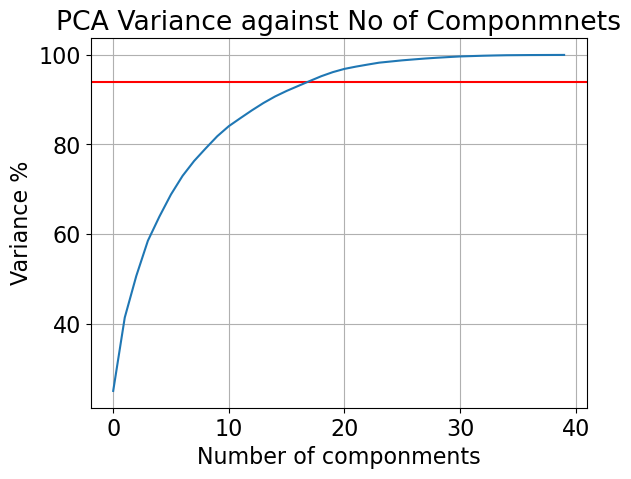

In [75]:
from sklearn.decomposition import PCA

# Dimensionality reduction
pca = PCA()
pca.fit(X_train)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.title("PCA Variance against No of Componmnets")
plt.ylabel("Variance %")
plt.xlabel("Number of componments")
l = plt.axhline(94, color="red")

plt.plot(var1)
plt.grid()

#### FIT AND TRANSFORM

In [76]:
pca = PCA(n_components=17)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [77]:
X_test

array([[-1.84222548,  1.20657371, -0.9317234 , ...,  0.11872273,
         0.31517778,  0.8724334 ],
       [-0.66668056,  0.95155936, -1.17119991, ...,  0.28589893,
        -0.09941564,  0.72498159],
       [-0.24800618,  1.18220906, -1.09865808, ...,  0.67847928,
        -0.01160924,  0.53913147],
       ...,
       [ 0.11488548,  0.14704663, -0.58920757, ...,  0.08605536,
        -0.32499799, -2.11820027],
       [ 0.06581663,  0.13345165, -0.59711038, ...,  0.05217419,
        -0.30801208, -2.13665846],
       [ 0.06165135,  0.09884256, -0.60783861, ...,  0.08705596,
        -0.32483355, -2.07069227]])

#### MODEL SELECTION

In this section, I have employed different classification algorithms and compared them to determine which is the best predictive model for this analysis. The algorithms used are: 
* Logistics Regression
* Recursive Feature Elimination

I first of all define a function to calculate metrics: Accuracy, Precision, Recall and F1 Score to be used for this analysis.

In [78]:
def get_metrics (y_true,y_pred):
    acc = accuracy_score(y_true, y_pred)
    p = precision_score(y_true, y_pred,average=None).mean()
    r = recall_score(y_true, y_pred, average=None).mean()
    f1 = f1_score(y_true, y_pred, average=None).mean()

    print("Accuracy: %.3f \nPrecesion: %.3f \nRecall: %.3f \nF1:%.3f \n"% (acc,p,r,f1) )   

#### LOGISTICS REGRESSION

The logistic regression is implemented as a linear model for classification rather than regression. It models the probability of an event taking place by having the log-odds for the event be a linear combination of one or more independent variables. I t can be used for both binary and multivariate tasks

In [85]:
# Define model, fit and predict

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Get metrics
get_metrics(y_test, y_pred)

Accuracy: 0.216 
Precesion: 0.207 
Recall: 0.206 
F1:0.178 



#### Recursive Feature Elimination

The RFE model is implemented which is easy to configure and use where selection of features(columns) in a training dataset based on most relevent in predicting the target variable. we can be used for those features which we eliminate from training datatset for feature selection.

In [89]:

log_reg_model = LogisticRegression()

rfe = RFE(estimator=log_reg_model, n_features_to_select=5).fit(X_train, y_train)

rfe_pred = rfe.predict(X_test)

get_metrics(y_test, rfe_pred)

Accuracy: 0.167 
Precesion: 0.136 
Recall: 0.144 
F1:0.123 



In [91]:
# Cross Validate 

classifiers = [LogisticRegression()]

score_lst = []
for cls in classifiers:
    # cross validate the accurancy
    acc  = accuracy_score(y_train, cross_val_predict(cls, X_train, y_train, cv = 5))
    # calcuate the error
    scores = cross_val_score(cls, X_train, y_train, scoring = "neg_mean_squared_error",cv= 5)
    score = np.sqrt(-scores)
    f1 = cross_val_score(cls,X_test, y_test, scoring = "f1_macro", cv = 5)
    
    score_lst.append([cls.__class__.__name__, acc, score.mean(), f1.mean()])

df_scores=pd.DataFrame(columns = ["Clasifier","Accurancy","MSE","F1"],data =  score_lst)
display(df_scores)

,Clasifier,Accurancy,MSE,F1
0,LogisticRegression,0.543535,6.147773,0.471555


## 7. INTERPRETATION

Accuracy score is the fraction of correct predictions versus the total prediction.  However, this measure doesn't show the accuracy of prediction of our model (i.e., it may accurately predict one class with an excellent level of accuracy). The logistic regression and Recursive Feature Elimination' accuracy scores are still rather poor. This could be a sign that the models are unable to predict any of the dataset's classes.

The percentage of accurate positive predictions is known as precision. A accuracy score that is near to one is considered good.
The amount of positive samples that are accurately grouped is called recall. An perfect classifier would have it near to 1.  
Both the logistic and Recursive Feature Elimination have poor Precision and Recall ratings. This shows the models are not accurately predicting the classes.

The precision and recall harmonic means that they combine to get the F1 score. As before, an excellent classifier should have an F1 score greater than 0.5. Both classifiers' scores are still quite low.

## 8. SUMMARY

Our logistical regression and Recursive Feature Elimination worked extremely poorly, as shown by the modelling result, suggesting that they had difficulty handling the multivarite data. The number of predicted activity data ranged (1 - 18). The algorithm might not have been able to accurately learn to predict every one of these types. Using grouped activity data—rigorous, moderate, and light activities—for prediction could be one way to address this. Each task needs to be grouped with a matching label (0 = Light, 1 = Moderate, and 2 = Rigorous) and numbered 0, 1, 3. Before modelling, the activities can be grouped into suitable groups using the unsupervised learning technique KMeans.

Another potential issue in this analysis is data leakage. When information not included in the training dataset is utilised to build the model, this is known as data leakage. It could result in the creation of overly optimistic models that are nearly worthless and inappropriate for production use. Data leakage might have happened at this moment when the fit_transform method was used for dimensionality reduction. The data could be placed in a processing pipeline as an option for this. This ensures that the test data cannot be obtained by the algorithm before the prediction.

Also, There is an unequal number of sample sizes within the class (activityID) labels. We could determine from the analysis that physically demanding tasks had a lower timstamp (data), such as jogging and rope jumping. There weren't many examples of these activities available for the classification algorithms to learn from and generate precise predictions. To make the model better, more information for these activities has to be supplied. Other sampling strategies (oversampling, undersampling) can be used to artificially create more data if additional data is not available.

And, An algorithm's learning process is controlled by the value of a hyperparameter. They are manually set rather than being identified by the algorithm based on available data. The selection of a hyperparameter affects the level of accuracy and efficacy with which the optimising process predicts parameters. To maximise the performance of the model, a suitable combination of hyperparameters should be identified by hyperparameter tuning. Tuning can be performed by using already present algorithms (such as GridSearch) to automate the process or by doing several trials in a single training session. 

More Robost Models: To increase accuracy, more multivariate-capable robost models can be used. It is also recommended to eliminate Subject_id = 9, which had a few timesatmps, as it may introduce error in the analysis. 
To increase accuracy, the cross validation method CV might also be increased. The best validation result should be selected and applied to the test data.

In [94]:
import io
from nbformat import read
filepath="DSRM-Uday.ipynb"
with io.open(filepath, 'r', encoding='utf-8') as f:
    nb=read(f, 4)
word_count = 0
for cell in nb['cells']:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count))

Submission length is 3891


# REFERENCES

- Data Science Researchh Methods, Lab 1 - 10
- Data Science Research Methods, Lecture slides
- https://flexbooks.ck12.org/cbook/ck-12-probability-and-statistics-concepts/section/4.6/primary/lesson/interpreting-histograms-pst/
- https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)
- https://en.wikipedia.org/wiki/Cross-validation_(statistics)
- https://en.wikipedia.org/wiki/Skewness
- https://en.wikipedia.org/wiki/Correlation
- https://en.wikipedia.org/wiki/Logistic_regression
- https://scikit-learn.org/stable/modules/cross_validation.html
- https://machinelearningmastery.com/rfe-feature-selection-in-python/
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler
- https://en.wikipedia.org/wiki/Dimensionality_reduction
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- https://flexbooks.ck12.org/cbook/ck-12-probability-and-statistics-concepts/section/4.6/primary/lesson/interpreting-histograms-pst/
- https://www.fortunebusinessinsights.com/fitness-tracker-market-103358
